# Dataset


The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


## Pythons libs

We can import here all the libraries we need for the notebook.

In [84]:
import json
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 5] # default = [6.0, 4.0]
plt.rcParams['figure.dpi']     = 200     # default = 72.0
plt.rcParams['font.size']      = 7.5     # default = 10.0

import sklearn
from sklearn.model_selection import train_test_split


from sklearn.utils import all_estimators
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [85]:
df = pd.read_csv("D:\\Bike case study\\Python_For_Data_Analysis_Seoul_Bike-main\\SeoulBikeData.csv",encoding= 'unicode_escape')
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

We canc clearly see that out dataframe deserve some little changes to be more suitable to work with. 
- The columns names are too long, so I can change their names to be shorter without loosing to much information
- The *Holiday* and *Functionning Day* columns are booleans but in a string format so I can change this to have a 0 or 1 format
- The *Date* format is a string with *dd/mm/yyyy* format. Let's change it to standart format *yyyy/mm/dd* and date type 

In [86]:
shorter_column_name = [
 'date',    # Date
 'n_bike',  # Rented Bike Count
 'hour',    # Hour
 'temp',    # Temperature (°C)
 'hum',     # Humidity (%)
 'wind',    # Wind speed (m/s)
 'visb',    # Visibility (10m)
 'dew',     # Dew point temperature (°C)
 'solar',   # Solar Radiation (MJ/m2)
 'rain',    # Rainfall(mm)
 'snow',    # Snowfall (cm)
 'season',  # Seasons
 'holiday', # Holiday
 'func'     # Functioning Day
]
df.columns = shorter_column_name
df['func'] = (df['func'] == "Yes").astype(int)
df['holiday'] = (df['holiday'] == "Holiday").astype(int)
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y")
df

date  n_bike  hour  temp  hum  wind  visb   dew  solar  rain  snow  \
0    2017-12-01     254     0  -5.2   37   2.2  2000 -17.6    0.0   0.0   0.0   
1    2017-12-01     204     1  -5.5   38   0.8  2000 -17.6    0.0   0.0   0.0   
2    2017-12-01     173     2  -6.0   39   1.0  2000 -17.7    0.0   0.0   0.0   
3    2017-12-01     107     3  -6.2   40   0.9  2000 -17.6    0.0   0.0   0.0   
4    2017-12-01      78     4  -6.0   36   2.3  2000 -18.6    0.0   0.0   0.0   
...         ...     ...   ...   ...  ...   ...   ...   ...    ...   ...   ...   
8755 2018-11-30    1003    19   4.2   34   2.6  1894 -10.3    0.0   0.0   0.0   
8756 2018-11-30     764    20   3.4   37   2.3  2000  -9.9    0.0   0.0   0.0   
8757 2018-11-30     694    21   2.6   39   0.3  1968  -9.9    0.0   0.0   0.0   
8758 2018-11-30     712    22   2.1   41   1.0  1859  -9.8    0.0   0.0   0.0   
8759 2018-11-30     584    23   1.9   43   1.3  1909  -9.3    0.0   0.0   0.0   

      season  holiday  func  
0     Winter        0     1  
1     Winter        0     1  
2     Winter        0     1  
3     Winter        0     1  
4     Winter        0     1  
...      ...      ...   ...  
8755  Autumn        0     1  
8756  Autumn        0     1  
8757  Autumn        0     1  
8758  Autumn        0     1  
8759  Autumn        0     1  

[8760 rows x 14 columns]

Then, as we have only one categorical variable **season** (for now), we can display a short descriptions of the numerical features. Here we have :
- **n_bike** : Corresponding to the number of bike rented in Seoul for a specific hour 
- (**date**, **hour**) : describe the time (unique) of the sample
- **func** : describe if the rental if functionnal for the specific hour
- the other feautures are meteorological description of Seoul at this time.

We will go deeper in these descriptions during the analysis.

In [88]:
df.describe()

n_bike         hour         temp          hum         wind  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean    704.602055    11.500000    12.882922    58.226256     1.724909   
std     644.997468     6.922582    11.944825    20.362413     1.036300   
min       0.000000     0.000000   -17.800000     0.000000     0.000000   
25%     191.000000     5.750000     3.500000    42.000000     0.900000   
50%     504.500000    11.500000    13.700000    57.000000     1.500000   
75%    1065.250000    17.250000    22.500000    74.000000     2.300000   
max    3556.000000    23.000000    39.400000    98.000000     7.400000   

              visb          dew        solar         rain         snow  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean   1436.825799     4.073813     0.569111     0.148687     0.075068   
std     608.298712    13.060369     0.868746     1.128193     0.436746   
min      27.000000   -30.600000     0.000000     0.000000     0.000000   
25%     940.000000    -4.700000     0.000000     0.000000     0.000000   
50%    1698.000000     5.100000     0.010000     0.000000     0.000000   
75%    2000.000000    14.800000     0.930000     0.000000     0.000000   
max    2000.000000    27.200000     3.520000    35.000000     8.800000   

           holiday         func  
count  8760.000000  8760.000000  
mean      0.049315     0.966324  
std       0.216537     0.180404  
min       0.000000     0.000000  
25%       0.000000     1.000000  
50%       0.000000     1.000000  
75%       0.000000     1.000000  
max       1.000000     1.000000

# Analysis and preprocessing

## Missing Values

Let's start our analysis dealing with missing values. To be sure the dataset is cleaned, I compute the number of missing values for each columns on the entire dataset. 

In [89]:
df.isnull().sum().reset_index(name='NA_count').sort_values(by='NA_count', ascending=False)

index  NA_count
0      date         0
1    n_bike         0
2      hour         0
3      temp         0
4       hum         0
5      wind         0
6      visb         0
7       dew         0
8     solar         0
9      rain         0
10     snow         0
11   season         0
12  holiday         0
13     func         0

 no missing value (rare event). The dataset is very clean and homogeneous.

## Functionning Day

Before to dive into the analysis, let's explore the number of rented bikes on hours according to whether or not this is a functionning day.

In [90]:
df.groupby(['func']).agg({'n_bike': ['mean', 'std', 'count']}).reset_index()

func      n_bike                  
              mean         std count
0    0    0.000000    0.000000   295
1    1  729.156999  642.351166  8465

We can see that the number of rented bike is 0 for hours when this is a non functionning day. In other words, we can not train a model on the features to predict ifthe number of rented bikes per hours based on the non functionning days. 
So I remove these samples from the dataset. 

In [91]:
N = len(df)
print(f'Dataset number of samples before non-functionning days deletion: {len(df)}')
print(f'Number of non-functionning days: {len(df[df.func != 1])}')
df = df[df.func == 1].drop('func', axis=1)
print(f'Dataset number of samples after  non-functionning days deletion: {len(df)}')


Dataset number of samples before non-functionning days deletion: 8760
Number of non-functionning days: 295
Dataset number of samples after  non-functionning days deletion: 8465


## Rented Bike Count

As I said before, the target will be the number of bike rented. 
More precisely, each sample gives the number of bike rented for each hours from 2017-12-01 to 2018-11-30. 
We can conclude it is a regression task to predict the number of bikes rented for a given hour based on the temporal and meteorologiical features the dataset contains.

For these hours, I want to see the distribution of the number of rented bikes.

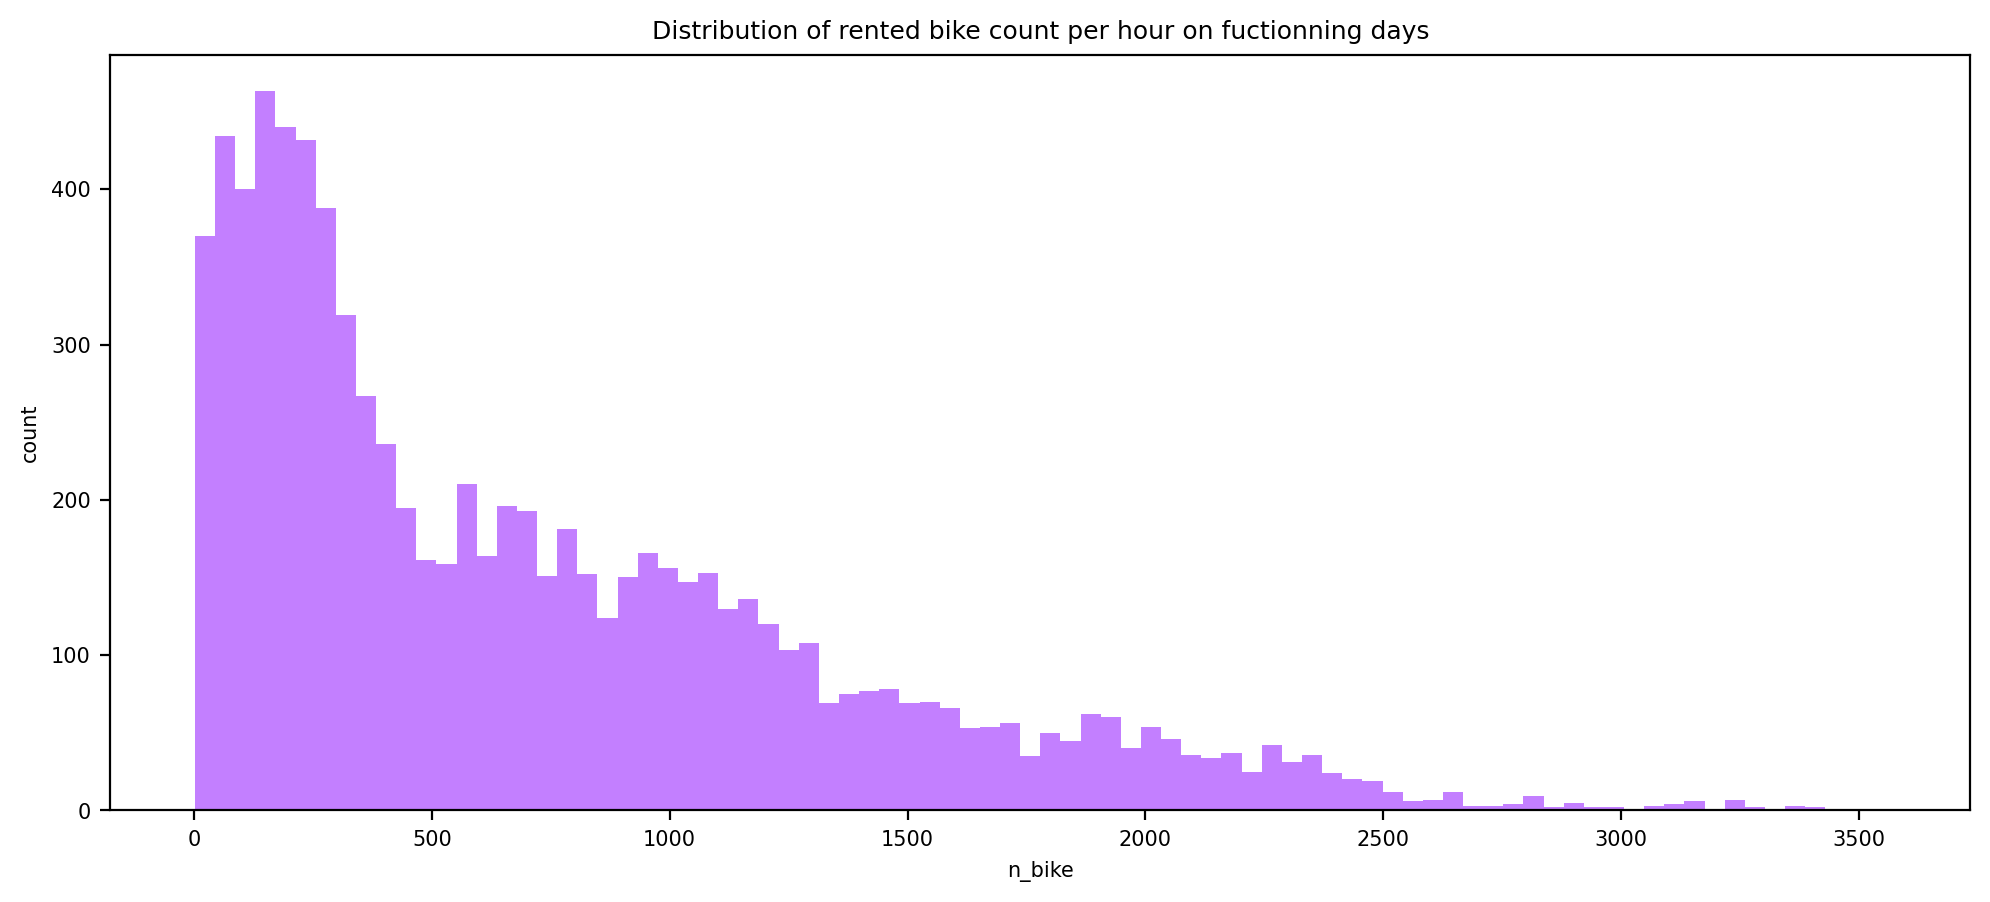

In [92]:
N = len(df) // 100

plt.hist(x=df.n_bike, bins=N, color='#8800ff', alpha=0.5)
plt.title('Distribution of rented bike count per hour on fuctionning days')
plt.xlabel('n_bike')
plt.ylabel('count')
pass

**TRANSFORMATION REMINDER** 
>
>**Square Root**
>
>The square root method is typically used when your data is moderately skewed. Now using the square root is  a transformation that has a moderate effect on distribution shape. It is generally used to reduce right skewed data. Finally, the square root can be applied on zero values and is most commonly used on counted data.
>
>**Logarithmic**
>
>The logarithmic is a strong transformation that has a major effect on distribution shape. This technique is, as the square root method, oftenly used for reducing right skewness. However, is that it can not be applied to zero or negative values.

Here we can see the distribution is right skewed. A square root or log transformation is needed to standize this distribution. I will choose a square root transformation because don't want a high effect because of the values from approximatively 500 to 1200. We see on this range 2 gaussian-like subdistribution.

(For the example I will plot both the distribution of log and sqrt distribution)

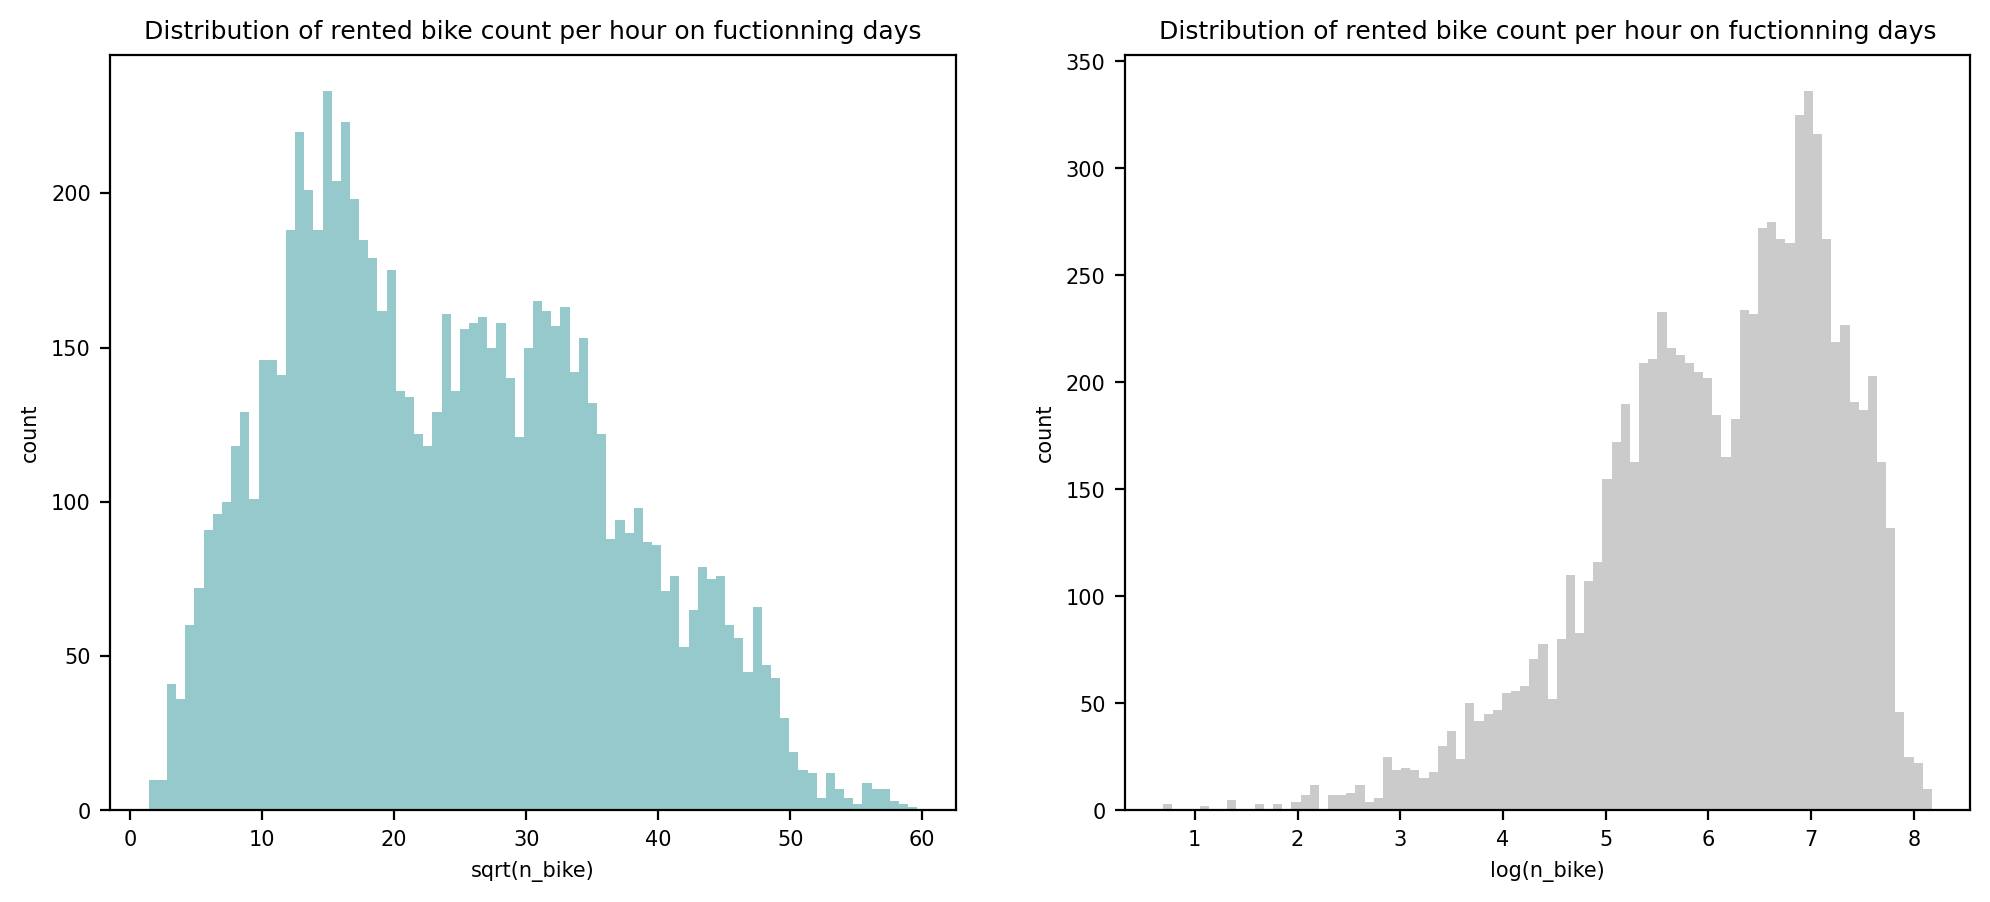

In [93]:
fig, axes = plt.subplots(1, 2)

# sqrt transformation
axes[0].hist(x=np.sqrt(df.n_bike), bins=N, color='#2f9599', alpha=0.5)
axes[0].set_title('Distribution of rented bike count per hour on fuctionning days')
axes[0].set_xlabel('sqrt(n_bike)')
axes[0].set_ylabel('count')

# log transformation
axes[1].hist(x=np.log(df.n_bike), bins=N, color='#999999', alpha=0.5)
axes[1].set_title('Distribution of rented bike count per hour on fuctionning days')
axes[1].set_xlabel('log(n_bike)')
axes[1].set_ylabel('count')
pass

We can conclude a sqrt is most suitable for the n_bike distribution to have a more gaussian-like distribution. Moreover, we can clearly see the 2 gaussian like distributions I'll spoke about before are leading to a left skewed distribution with a log-transform.

In [94]:
df['n_bike'] = np.sqrt(df.n_bike)


we can extract more informations from the *date* and *hour* .
I extract : 
- Year (int)
- Month (str)
- Day (int)
- Week day (str)
- Working day (bool) : wether or not is is a monday to friday day when Coreans work

In [95]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['week_day'] = df['date'].dt.day_name()
df['working_day'] = (df['date'].dt.dayofweek < 5).astype(np.int)

df = df.drop('date', axis=1)
time_cols = ['year', 'month', 'day', 'week_day', 'working_day', 'season', 'holiday']
df[time_cols + ['n_bike']]

year     month  day week_day  working_day  season  holiday     n_bike
0     2017  December    1   Friday            1  Winter        0  15.937377
1     2017  December    1   Friday            1  Winter        0  14.282857
2     2017  December    1   Friday            1  Winter        0  13.152946
3     2017  December    1   Friday            1  Winter        0  10.344080
4     2017  December    1   Friday            1  Winter        0   8.831761
...    ...       ...  ...      ...          ...     ...      ...        ...
8755  2018  November   30   Friday            1  Autumn        0  31.670175
8756  2018  November   30   Friday            1  Autumn        0  27.640550
8757  2018  November   30   Friday            1  Autumn        0  26.343880
8758  2018  November   30   Friday            1  Autumn        0  26.683328
8759  2018  November   30   Friday            1  Autumn        0  24.166092

[8465 rows x 8 columns]

My objective through the following analysis is to prove (or not) the time features are good categorical features

### Day number in month

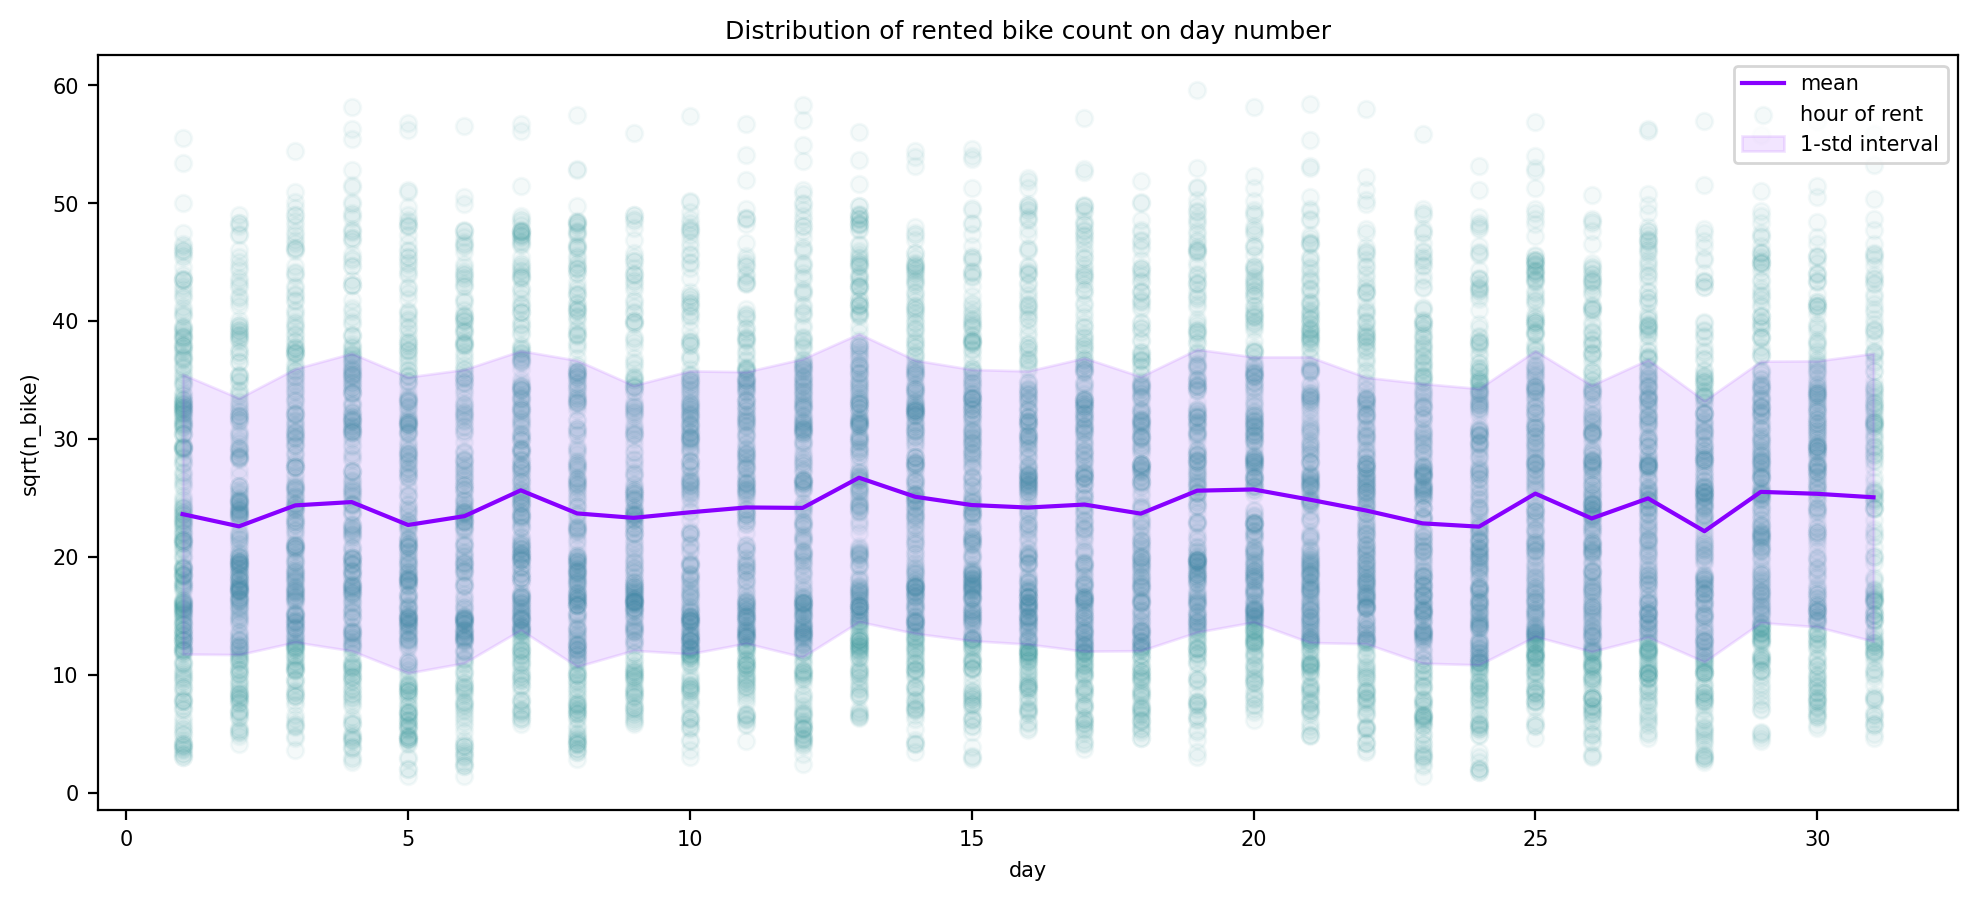

In [96]:
plt.scatter(df.day, df.n_bike, color='#2f9599', alpha=0.05, label='hour of rent')

_temp = df.groupby('day').agg({'n_bike': ['mean', 'std']}).reset_index()
mean = _temp.n_bike['mean']
std = _temp.n_bike['std']
plt.plot(_temp.day, mean, color='#8800ff', label='mean') 
plt.fill_between(_temp.day, mean - std, mean + std, color='#8800ff', alpha=0.1, label='1-std interval') 
plt.legend()
plt.title('Distribution of rented bike count on day number')
plt.xlabel('day')
plt.ylabel('sqrt(n_bike)')
pass

 I was hoping there was a trend to rent more bikes at the beginning of the month because the salary is recent. But no. 
To be at the begining, at the middle or at the end of the month seems to have almost zero influence on our target. 

Also, the year is not usable as the range of time is 2017-12-01 to 2018-11-30 so an exactly one-year window.

And what about the months and seasons ? 

### Month

In this part, I will be interested to see if the month (categorical) is a good feature to predict the number of bikes rented for a given hour in a given day. 
To do so, I display some aggregates for each months and I plot the notch-boxplot of distribution for the relatives number of bike rented.

n_bike                                       
           count      sum  mean  min   max median   std
month                                                  
December   744.0  11101.8  14.9  1.7  30.6   15.4   5.1
January    744.0  10031.6  13.5  4.2  26.5   13.5   4.5
February   672.0   9453.1  14.1  2.6  30.5   14.0   5.3
March      744.0  15507.9  20.8  1.4  45.8   21.4   8.8
April      696.0  17243.7  24.8  1.4  53.0   26.1  11.8
May        720.0  20488.5  28.5  2.4  57.0   30.6  13.1
June       720.0  23970.0  33.3  3.0  59.6   33.8  11.7
July       744.0  21824.1  29.3  3.0  56.5   28.8  11.3
August     744.0  20719.7  27.8  3.2  53.3   27.1  10.0
September  624.0  19237.2  30.8  4.8  57.4   31.9  11.4
October    665.0  19457.7  29.3  1.4  53.5   31.0  11.1
November   648.0  16328.9  25.2  3.5  48.5   26.4   9.2

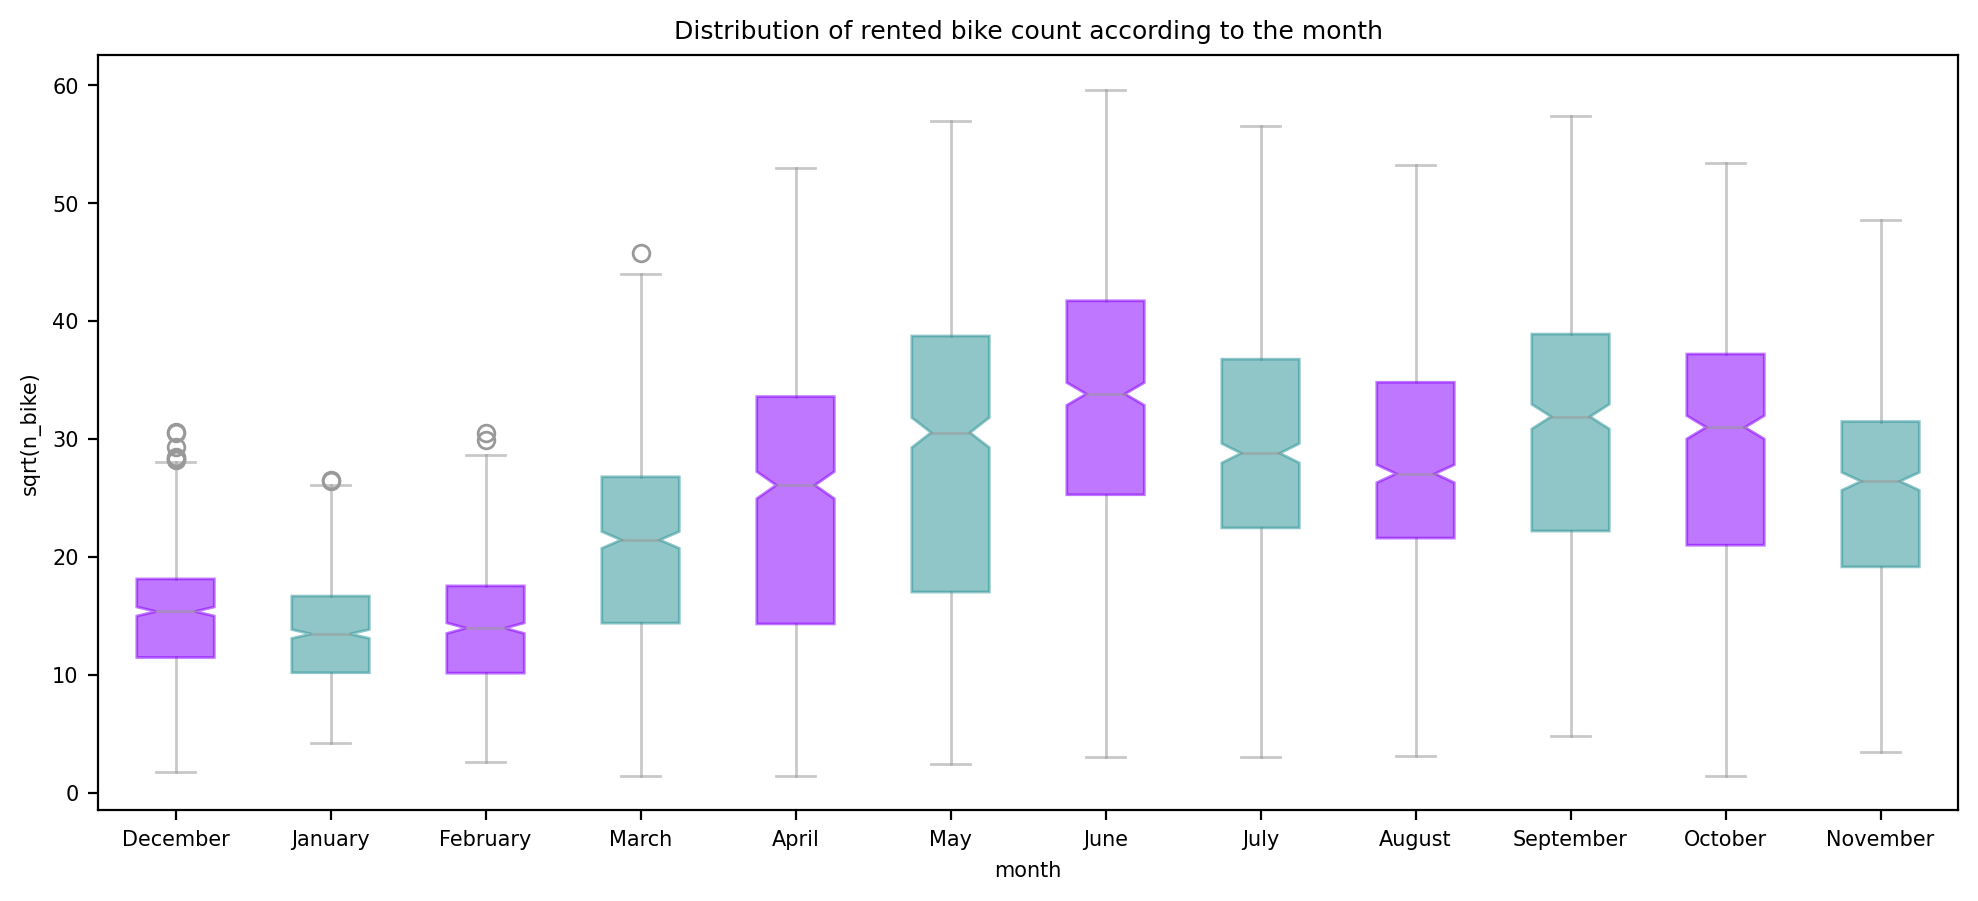

In [97]:
# group by month to get box plot
groups = df.groupby(by='month', sort=False).n_bike
labels = groups.count().reset_index(name='count').month.values
groups = [groups.get_group(k) for k in groups.groups]

# custom colors
gray_dict = dict(color='#99999988', markeredgecolor='#999999')
colors = ['#8800ff88', '#2f959988']
boxplot = plt.boxplot(
    groups, notch=True, vert=True, patch_artist=True, labels=labels,
    capprops=gray_dict, whiskerprops=gray_dict, flierprops=gray_dict, medianprops=gray_dict
)
# change box colors
for i, patch in enumerate(boxplot['boxes']):
    patch.set_color(colors[i%len(colors)])

plt.title('Distribution of rented bike count according to the month')
plt.xlabel('month')
plt.ylabel('sqrt(n_bike)')
# display multiple aggregates and remove the temporary columns
df.groupby('month', sort=False).agg({'n_bike': ['count', 'sum', 'mean', 'min', 'max', 'median', 'std']}).apply(lambda row: [f'{x:.1f}' for x in row])


Here we clearly see monthes has an impact on the number of bikes rented. Moreover we can suppose the season will be a good resume of this plot. Indeed we see for the winter monthes less bikes rented and inversely. 

### Seasons

In this part, I will show the same things I did for the month to see if the seasons are good features and a good summary of the month-result above. 

n_bike                                       
         count      sum  mean  min   max median   std
season                                               
Winter  2160.0  30586.4  14.2  1.7  30.6   14.2   5.0
Spring  2160.0  53240.1  24.6  1.4  57.0   24.5  11.8
Summer  2208.0  66513.8  30.1  3.0  59.6   30.1  11.3
Autumn  1937.0  55023.8  28.4  1.4  57.4   29.3  10.8

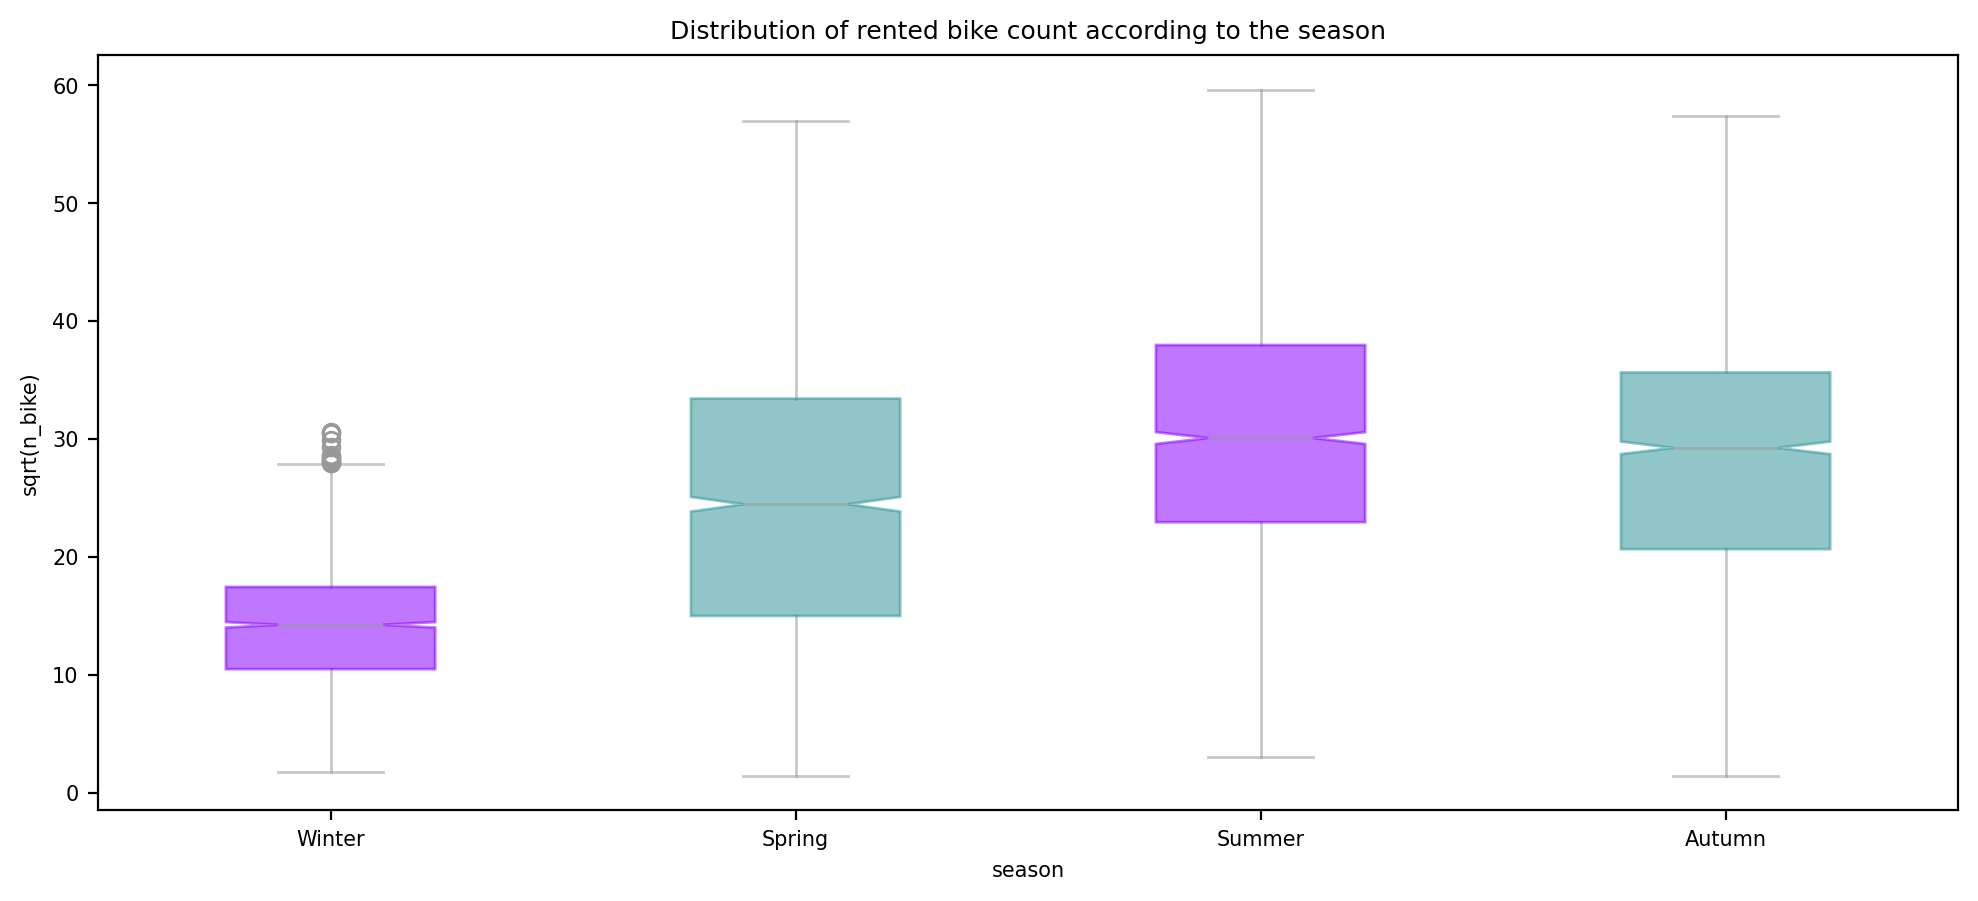

In [98]:
# group by season to get box plot
groups = df.groupby(by=['season'], sort=False).n_bike
labels = groups.count().reset_index(name='count').season.values
groups = [groups.get_group(k) for k in groups.groups]

# custom colors
gray_dict = dict(color='#99999988', markeredgecolor='#999999')
colors = ['#8800ff88', '#2f959988']
boxplot = plt.boxplot(
    groups, notch=True, vert=True, patch_artist=True, labels=labels,
    capprops=gray_dict, whiskerprops=gray_dict, flierprops=gray_dict, medianprops=gray_dict
)
# change box colors
for i, patch in enumerate(boxplot['boxes']):
    patch.set_color(colors[i%len(colors)])

plt.title('Distribution of rented bike count according to the season')
plt.xlabel('season')
plt.ylabel('sqrt(n_bike)')
# display multiple aggregates and remove the temporary columns
df.groupby('season', sort=False).agg({'n_bike': ['count', 'sum', 'mean', 'min', 'max', 'median', 'std']}).apply(lambda row: [f'{x:.1f}' for x in row])


As I said, during the winter months there are less bike rented.  

### Holiday

In this part, I will do the same thing as the month and season features but on the holiday one.

n_bike                                        
          count       sum  mean  min   max median   std
holiday                                                
0        8057.0  197273.6  24.5  1.4  59.6   23.7  11.8
1         408.0    8090.5  19.8  1.7  49.0   16.1  11.7

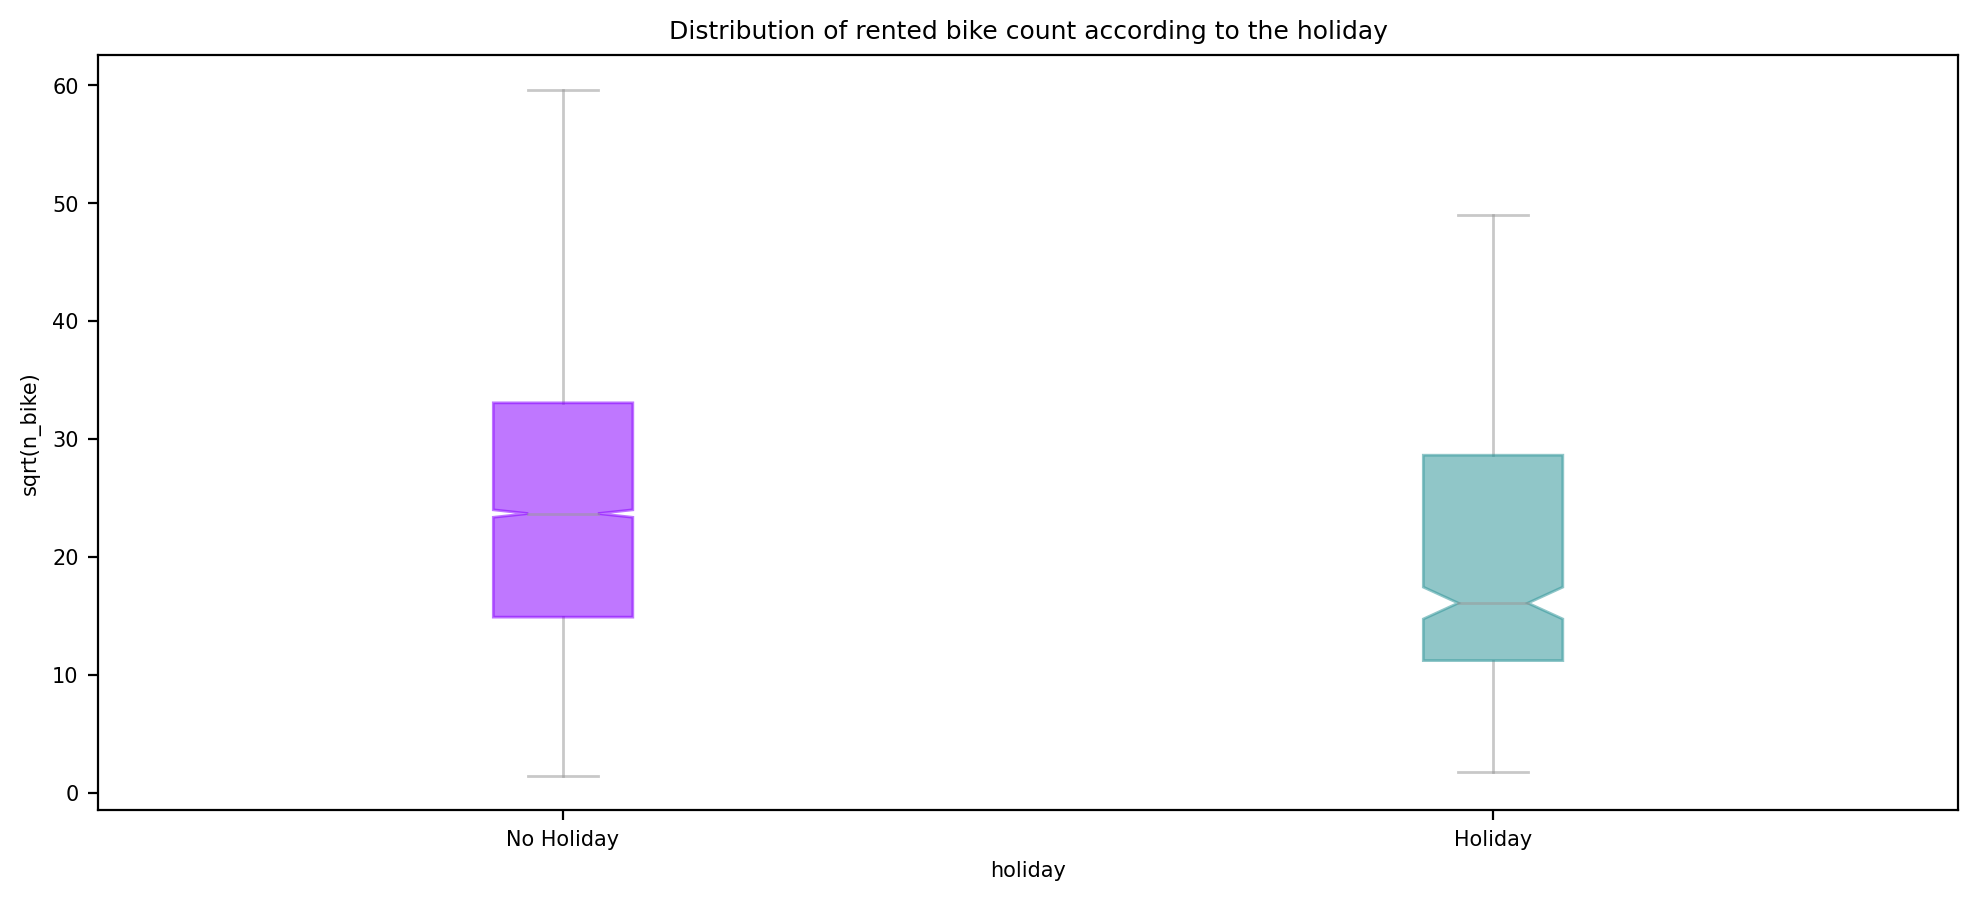

In [99]:
# group by holiday to get box plot
groups = df.groupby(by=['holiday'], sort=False).n_bike
labels = ['No Holiday', 'Holiday']
groups = [groups.get_group(k) for k in groups.groups]

# custom colors
gray_dict = dict(color='#99999988', markeredgecolor='#999999')
colors = ['#8800ff88', '#2f959988']
boxplot = plt.boxplot(
    groups, notch=True, vert=True, patch_artist=True, labels=labels,
    capprops=gray_dict, whiskerprops=gray_dict, flierprops=gray_dict, medianprops=gray_dict
)
# change box colors
for i, patch in enumerate(boxplot['boxes']):
    patch.set_color(colors[i%len(colors)])

plt.title('Distribution of rented bike count according to the holiday')
plt.xlabel('holiday')
plt.ylabel('sqrt(n_bike)')
# display multiple aggregates and remove the temporary columns
df.groupby('holiday', sort=False).agg({'n_bike': ['count', 'sum', 'mean', 'min', 'max', 'median', 'std']}).apply(lambda row: [f'{x:.1f}' for x in row])


It is not as clear as for the seasons or the months but there is a trend for less bike rented during holidays. We almost can conclude these bikes are rented to go to work.

### Hour

If my previous conclusion is valid, then, by plotting the mean number of rented bikes according to the hour we will see two peaks around 8h00 and 18h00.

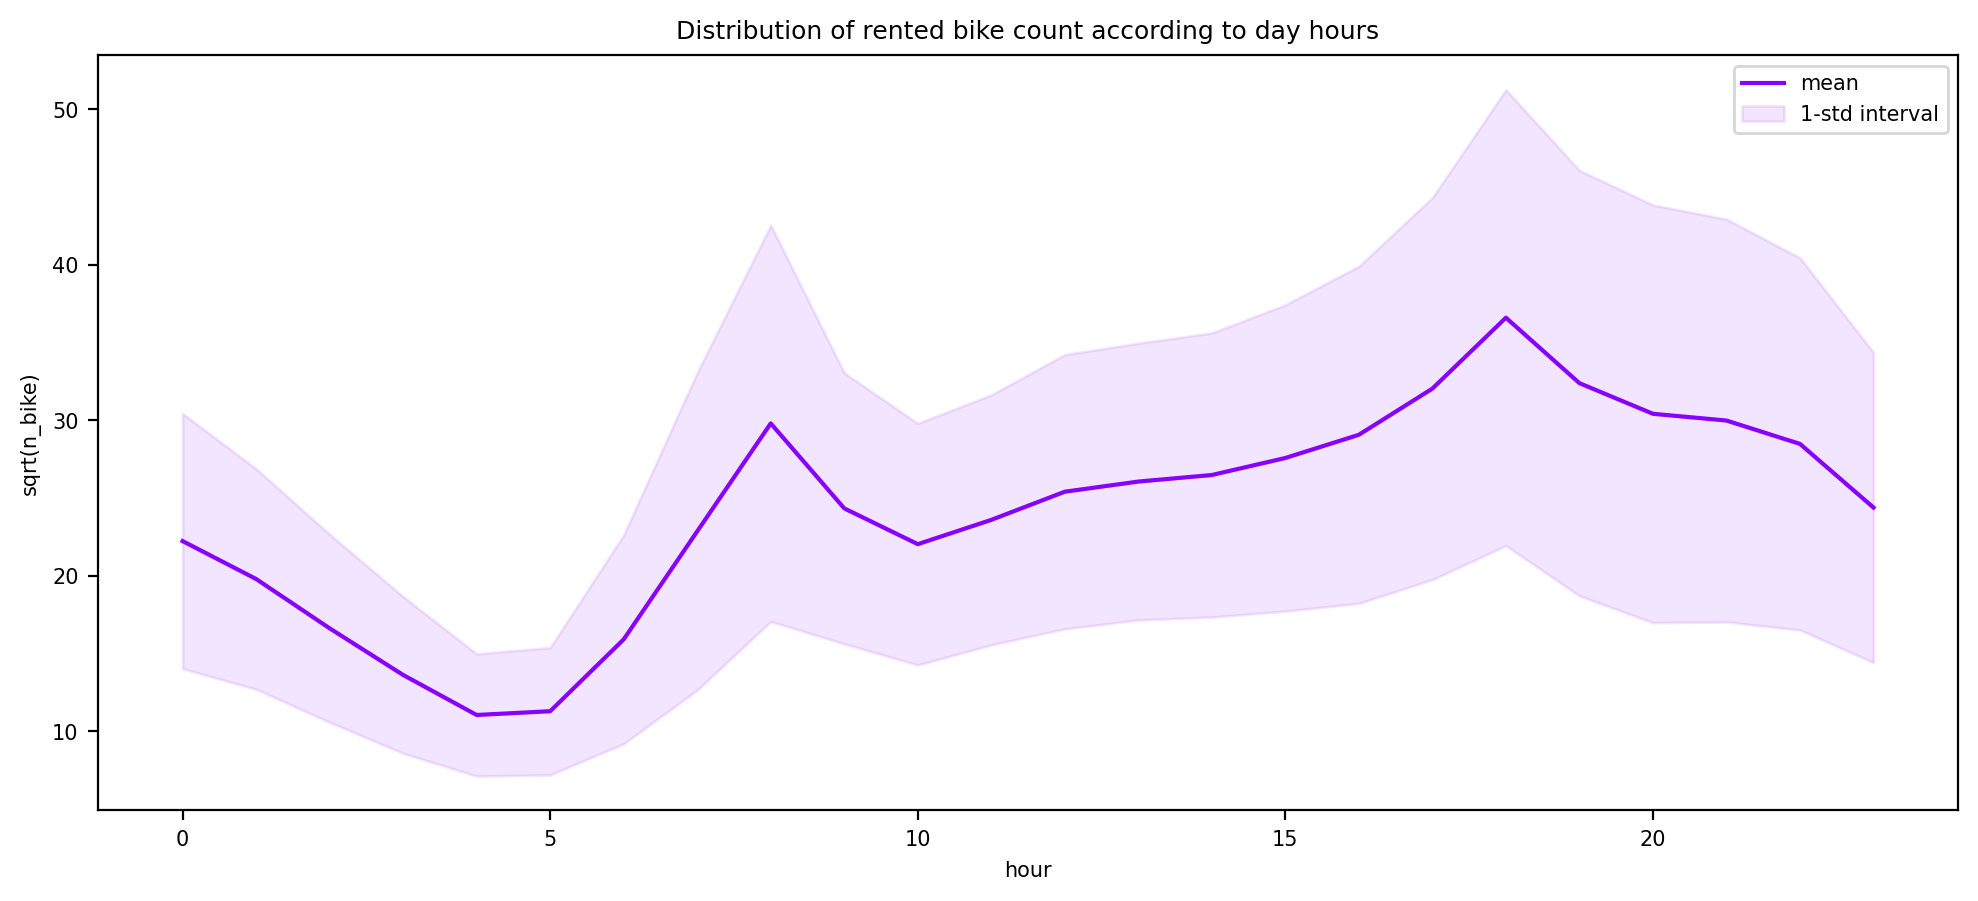

In [100]:
_temp = df.groupby('hour').agg({'n_bike': ['mean', 'std']}).reset_index()
mean = _temp.n_bike['mean']
std = _temp.n_bike['std']
plt.plot(_temp.hour, mean, color='#8800ff', label='mean') 
plt.fill_between(_temp.hour, mean - std, mean + std, color='#8800ff', alpha=0.1, label='1-std interval') 
plt.legend()
plt.title('Distribution of rented bike count according to day hours')
plt.xlabel('hour')
plt.ylabel('sqrt(n_bike)')
pass

As I supposed, we can see these peaks. So I can make a better supposition. This distribution will be improved for working days (monday to friday in Corea) and we probably can see another distribution for the weekend days.

### Week days

For this part, I will plot the distribution of the number of rented bikes according to the hour.
I will do it splitting the curves :
- day by day
- for working days and weekend days

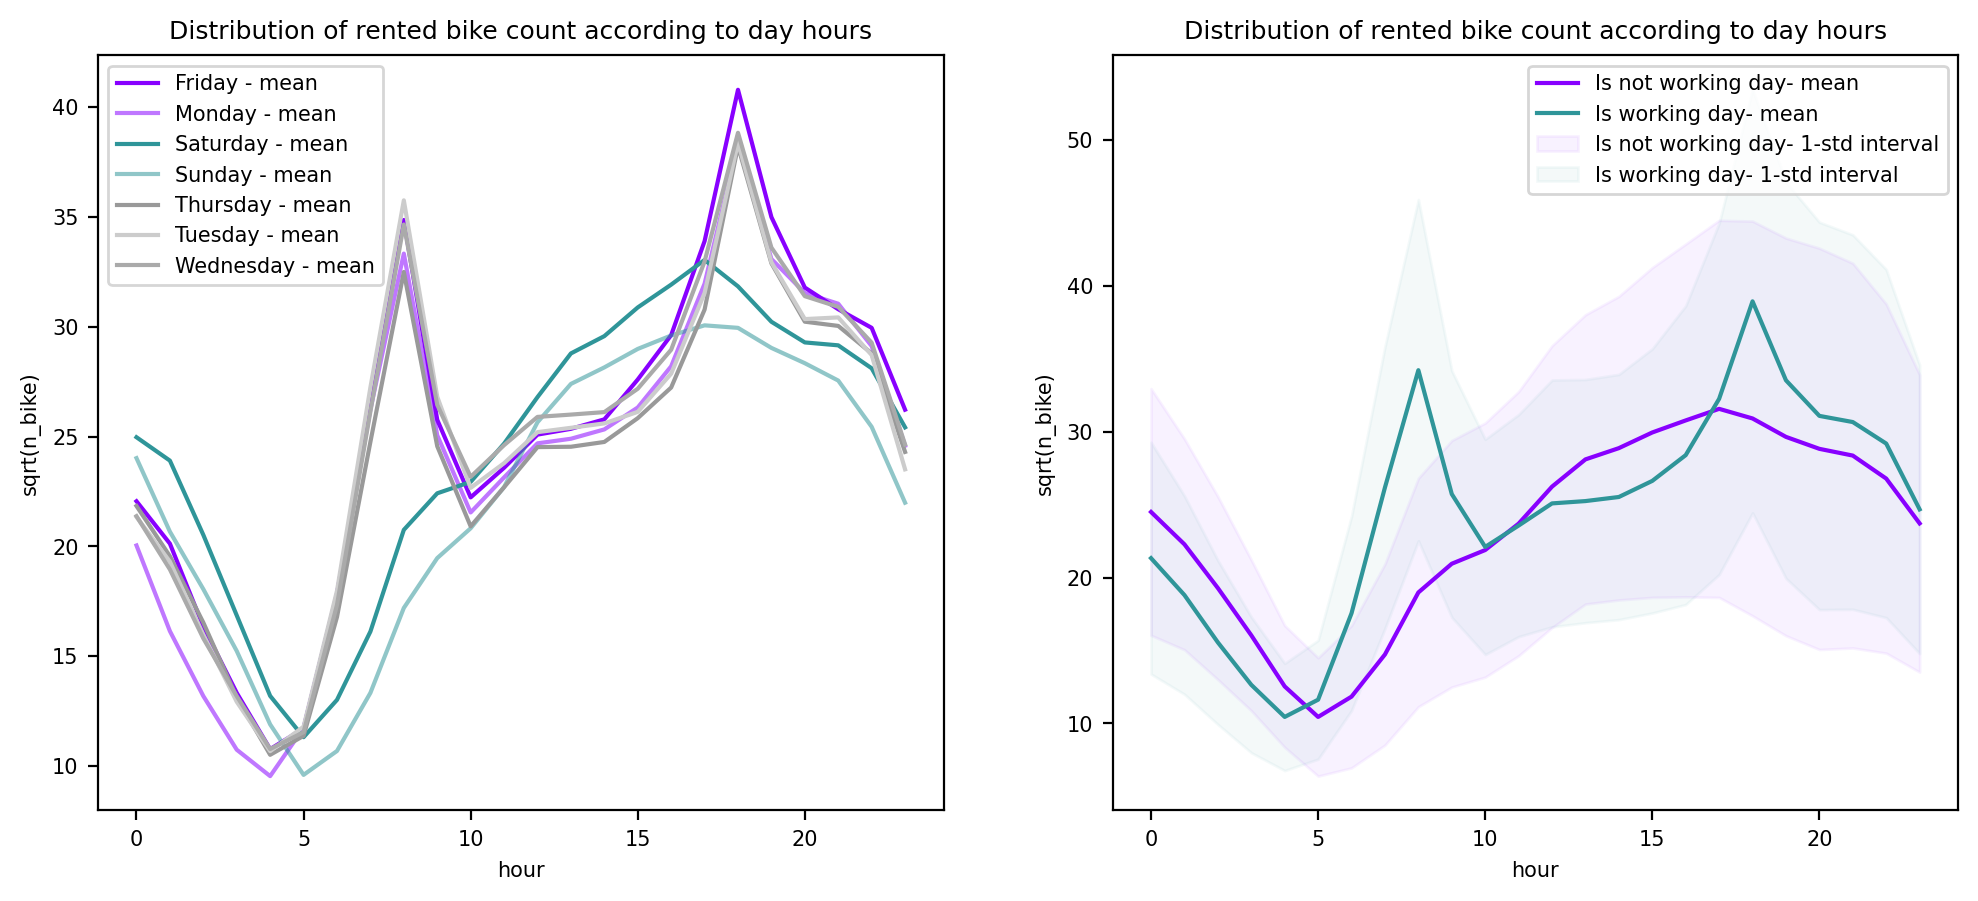

In [18]:
fig, axes = plt.subplots(1, 2)
# Weekdays plot
_temp = df.groupby(['week_day', 'hour']).agg({'n_bike': ['mean', 'std']}).reset_index()
colors = ['#80f', '#80f8', '#2f9599', '#2f959988', '#999', '#ccc', '#aaa']
for week_day, color in zip(_temp.week_day.unique(), colors):
    mean = _temp.n_bike[_temp.week_day == week_day]['mean']
    axes[0].plot(_temp[_temp.week_day == week_day].hour, mean, color=color, label=f'{week_day} - mean') 
axes[0].legend()
axes[0].set_title('Distribution of rented bike count according to day hours')
axes[0].set_xlabel('hour')
axes[0].set_ylabel('sqrt(n_bike)')

# working days plot
_temp = df.groupby(['working_day', 'hour']).agg({'n_bike': ['mean', 'std']}).reset_index()
colors = ['#8800ff', '#2f9599']
for working_day, color in zip(_temp.working_day.unique(), colors):
    mean = _temp.n_bike[_temp.working_day == working_day]['mean']
    std = _temp.n_bike[_temp.working_day == working_day]['std']
    axes[1].plot(_temp[_temp.working_day == working_day].hour, mean, color=color, label=f'{"Is" if working_day else "Is not"} working day- mean') 
    axes[1].fill_between(_temp[_temp.working_day == working_day].hour, mean - std, mean + std, color=color, alpha=0.05, label=f'{"Is" if working_day else "Is not"} working day- 1-std interval') 
axes[1].legend()
axes[1].set_title('Distribution of rented bike count according to day hours')
axes[1].set_xlabel('hour')
axes[1].set_ylabel('sqrt(n_bike)')

pass

 The distribution between :
- the working days and weekend days are really distinct
- the different working days are almost the same
- the different weekend days are almost the same even there are more bike rented on Saturday than Sunday


**To conclude :** 
The months, seasons, holidays, hours etc. as categorical are features are far most better features than a continuous time.

## Meteorological features

In this part I will explain what are the other features. Only remains the meteorological ones.

### Temperature and Dew point temperature 
The more the dew point and the temperature are high, the more the bike rider will feel confortable (asssuming natural Corean temperatures).

I will deal with  these two features simultaneously as we can assume these temperatures are correlated. Of course, I will plot a first scatter point to validate this assumption. 

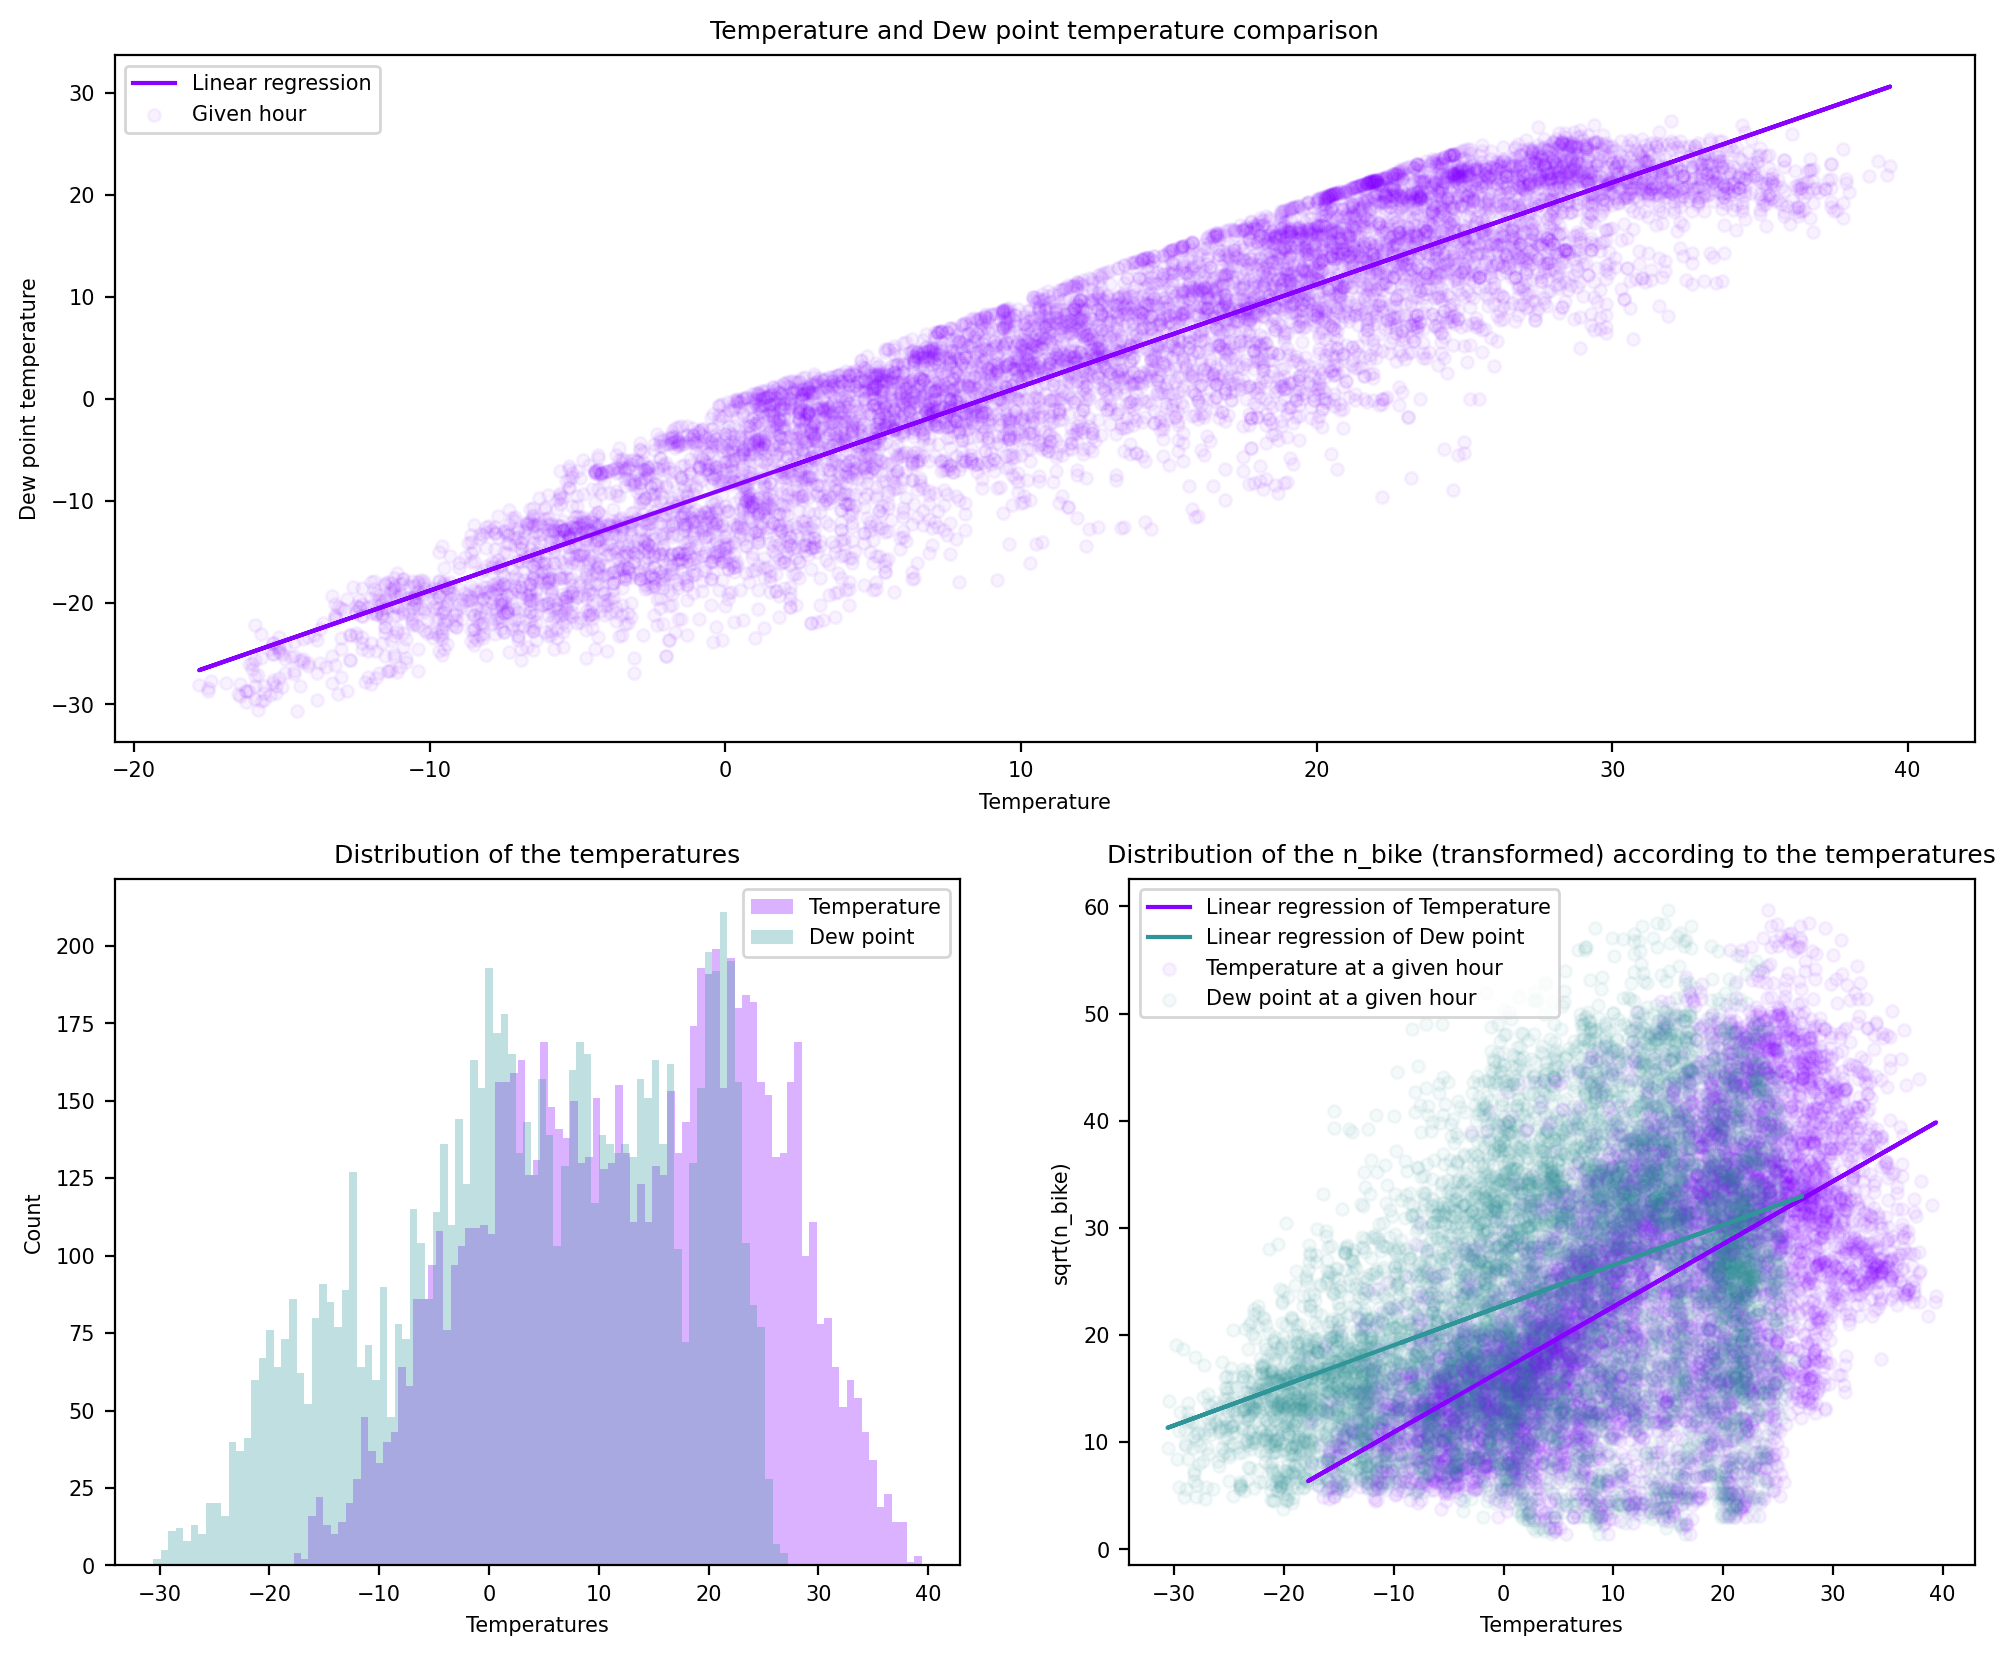

In [101]:
plt.rcParams['figure.figsize'] = [12, 10] # default = [6.0, 4.0]
N = len(df) // 100

# tempature and dew point comparison
ax = plt.subplot2grid((2, 2), (0, 0), colspan=2)
df.plot(x='temp', y='dew', kind='scatter', color='#8800ff', alpha=0.05, ax=ax, label='Given hour')
# add regression line
x, y = df.temp, df.dew
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#8800ff', label='Linear regression') 
# add legends
ax.set_title('Temperature and Dew point temperature comparison')
ax.set_xlabel('Temperature')
ax.set_ylabel('Dew point temperature')
ax.legend()

# Temperatures distributions
ax = plt.subplot2grid((2, 2), (1, 0), colspan=1)
ax.hist(x=df.temp, bins=N, color='#8800ff', alpha=0.3, label='Temperature')
ax.hist(x=df.dew, bins=N, color='#2f9599', alpha=0.3, label='Dew point')
# add legends
ax.set_title('Distribution of the temperatures')
ax.set_xlabel('Temperatures')
ax.set_ylabel('Count')
ax.legend()

# Temperatures and rented bikes distribution
ax = plt.subplot2grid((2, 2), (1, 1), colspan=1)
df.plot(x='temp', y='n_bike', kind='scatter', color='#8800ff', alpha=0.05, label='Temperature at a given hour', ax=ax)
df.plot(x='dew', y='n_bike', kind='scatter', color='#2f9599', alpha=0.05, label='Dew point at a given hour', ax=ax)
# add regression lines
x, y = df.temp, df.n_bike
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#8800ff', label='Linear regression of Temperature') 
x, y = df.dew, df.n_bike
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#2f9599', label='Linear regression of Dew point') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the temperatures')
ax.set_xlabel('Temperatures')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
plt.rcParams['figure.figsize'] = [12, 5] # default = [6.0, 4.0]
pass

The two tempatures seems correlated. 
Moreover, their distribution is near a gaussian one, so I let these two features without transformation. 
Finally, we can see the concrete argument I said before : the more the dew point and the temperature are high, the more the bike rider will feel confortable. It leads to more bike rented

### Humidity



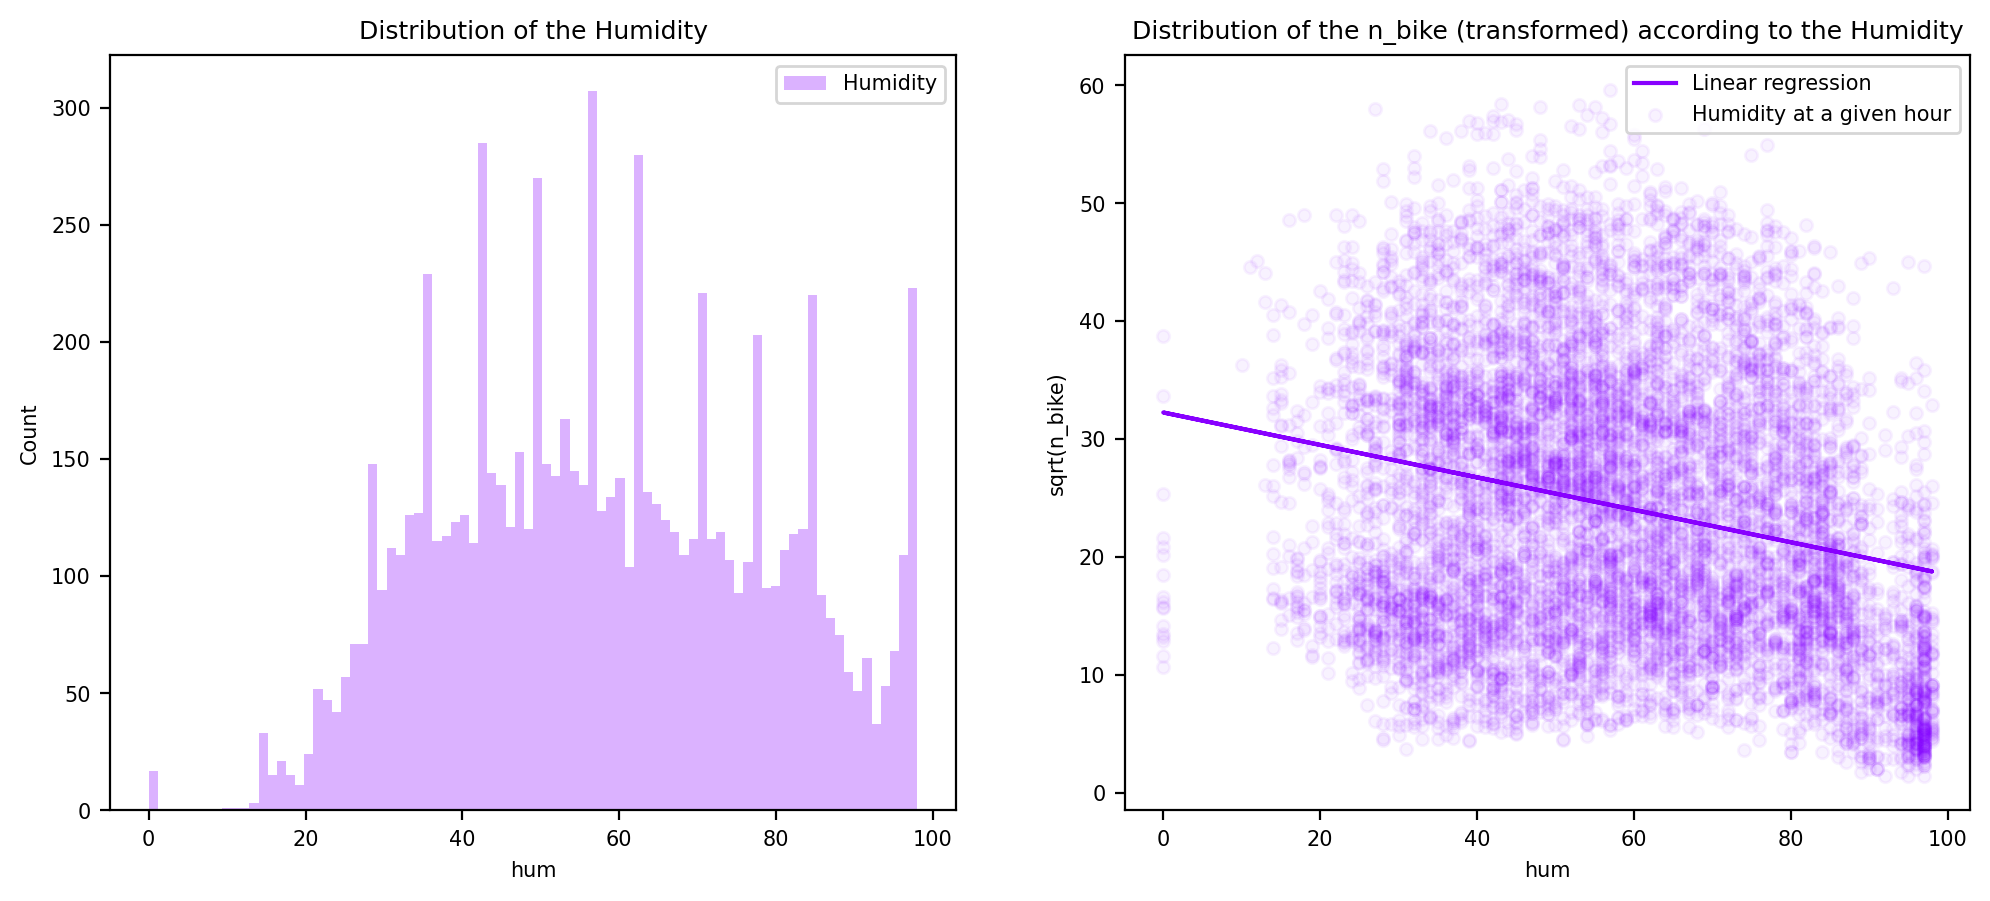

In [102]:
N = len(df) // 100

# Humidity distributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df.hum, bins=N, color='#8800ff', alpha=0.3, label='Humidity')
# add legends
ax.set_title('Distribution of the Humidity')
ax.set_xlabel('hum')
ax.set_ylabel('Count')
ax.legend()

# Humidity and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='hum', y='n_bike', kind='scatter', color='#8800ff', alpha=0.05, label='Humidity at a given hour', ax=ax)
# add regression line
x, y = df.hum, df.n_bike
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#8800ff', label='Linear regression') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the Humidity')
ax.set_xlabel('hum')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
pass

The humidity distribution is near a gaussian one (except near 100%), so I also let it without transformation. 
It is also clear  if the humidity is low, the more the bike rider will feel confortable. It leads to more bike rented.

### Wind speed



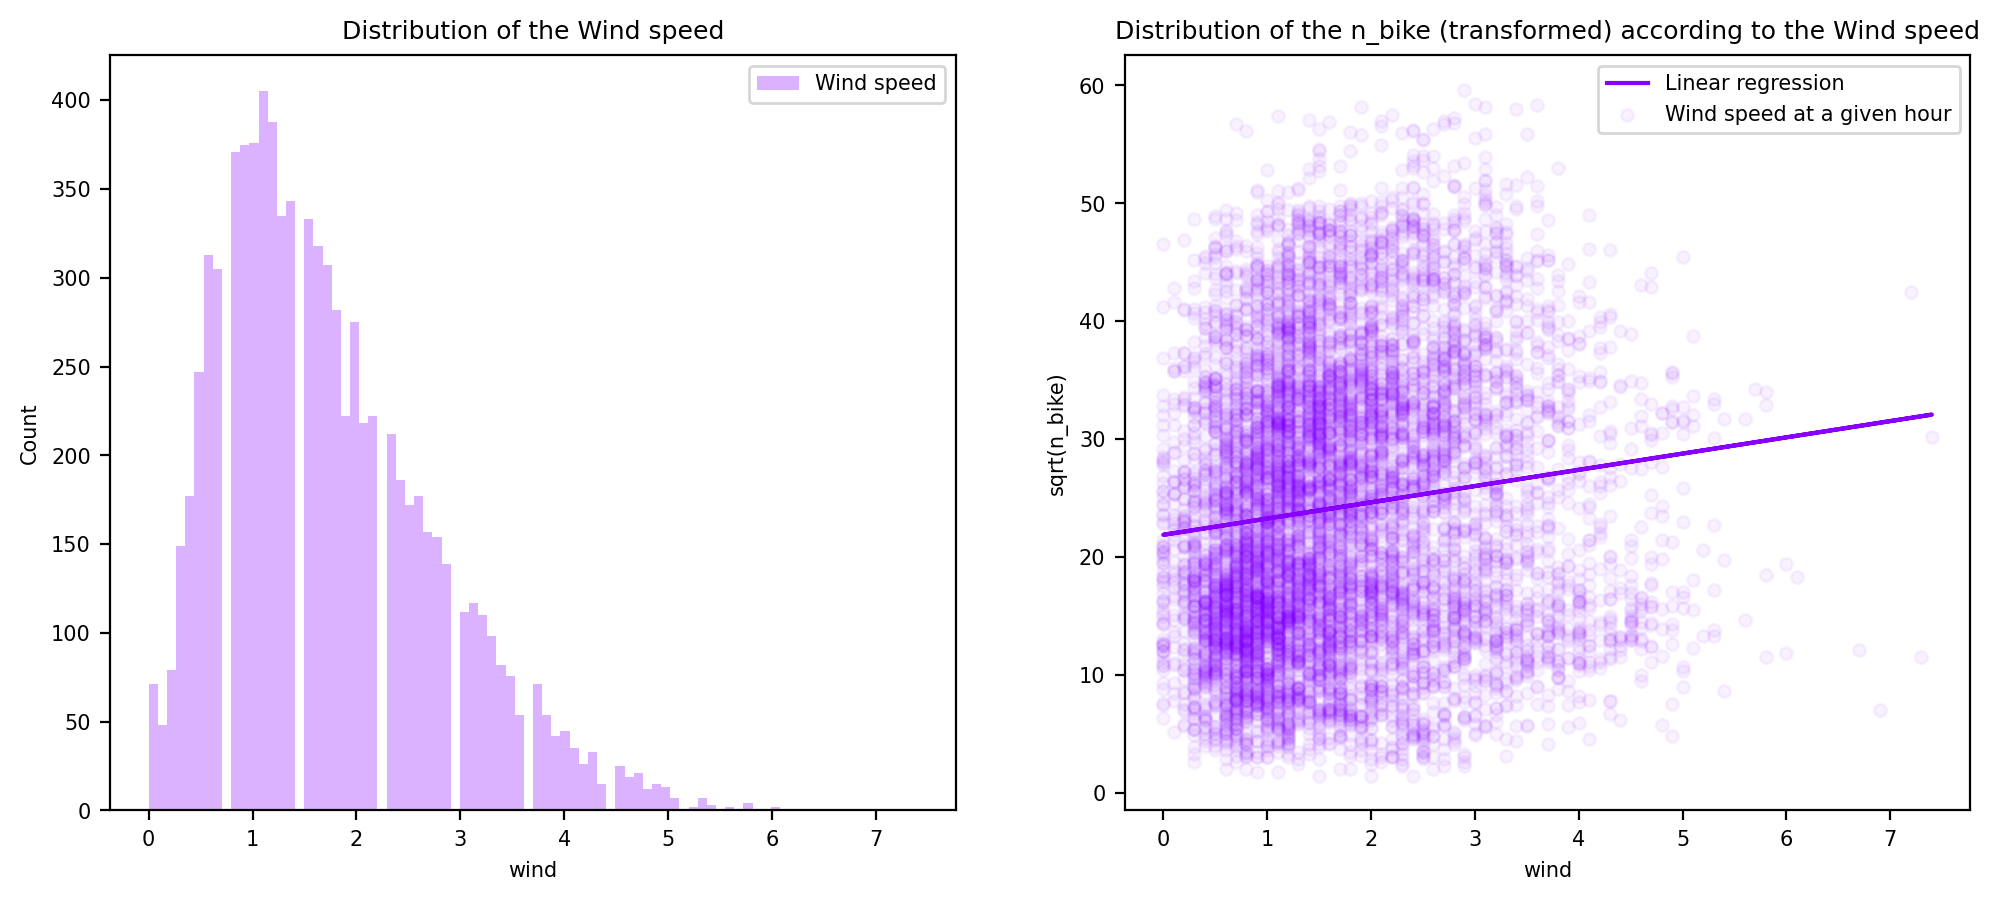

In [103]:
N = len(df) // 100

# Wind speed distributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df.wind, bins=N, color='#8800ff', alpha=0.3, label='Wind speed')
# add legends
ax.set_title('Distribution of the Wind speed')
ax.set_xlabel('wind')
ax.set_ylabel('Count')
ax.legend()

# Wind speed and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='wind', y='n_bike', kind='scatter', color='#8800ff', alpha=0.05, label='Wind speed at a given hour', ax=ax)
# add regression line
x, y = df.wind, df.n_bike
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#8800ff', label='Linear regression') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the Wind speed')
ax.set_xlabel('wind')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
pass

I expected to see that the wind speed will lead to less bikes rented but it is the opposite or maybe the wind can be comfortable for the rider in some mesure. 
I also see that the wind speed has a right skewed distribution. So I will apply a log-transform on this feature.

In [104]:
df['wind'] = np.log(df['wind'] + 1)

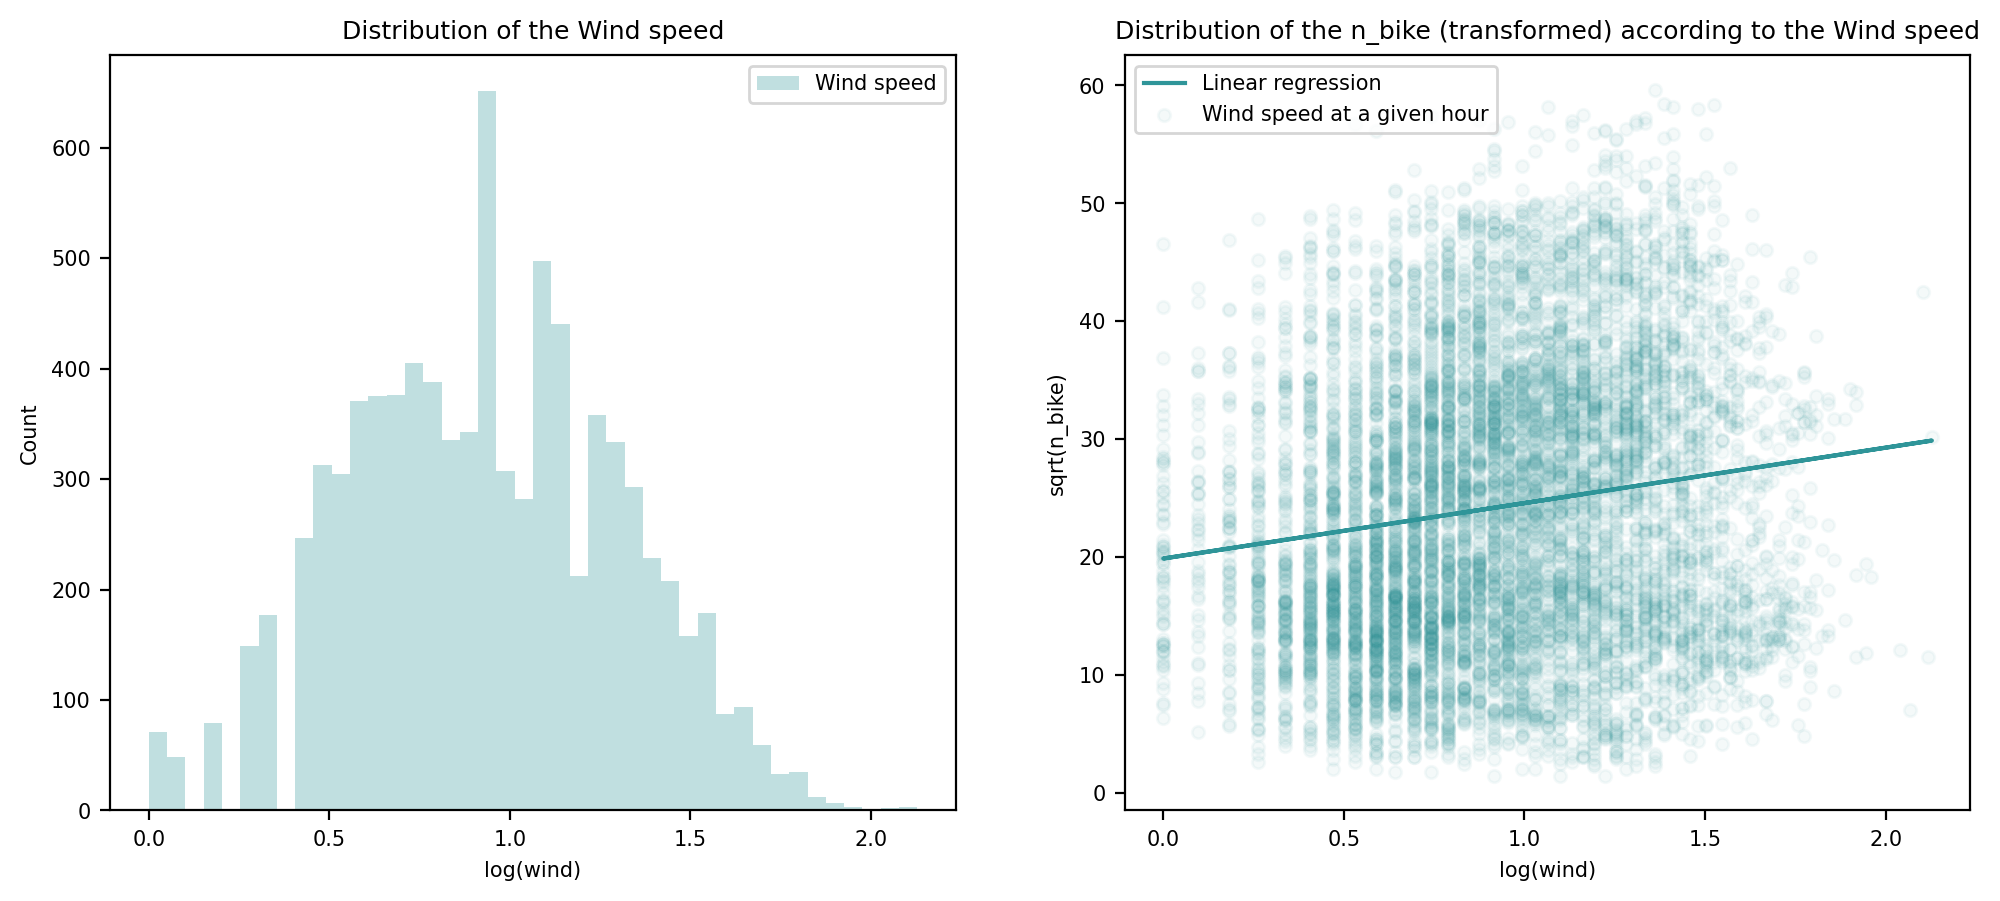

In [105]:
N = len(df) // 200

# Wind speed distributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df.wind, bins=N, color='#2f9599', alpha=0.3, label='Wind speed')
# add legends
ax.set_title('Distribution of the Wind speed')
ax.set_xlabel('log(wind)')
ax.set_ylabel('Count')
ax.legend()

# Wind speed and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='wind', y='n_bike', kind='scatter', color='#2f9599', alpha=0.05, label='Wind speed at a given hour', ax=ax)
# add regression line
x, y = df.wind, df.n_bike
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#2f9599', label='Linear regression') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the Wind speed')
ax.set_xlabel('log(wind)')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
pass

### Solar Radiation



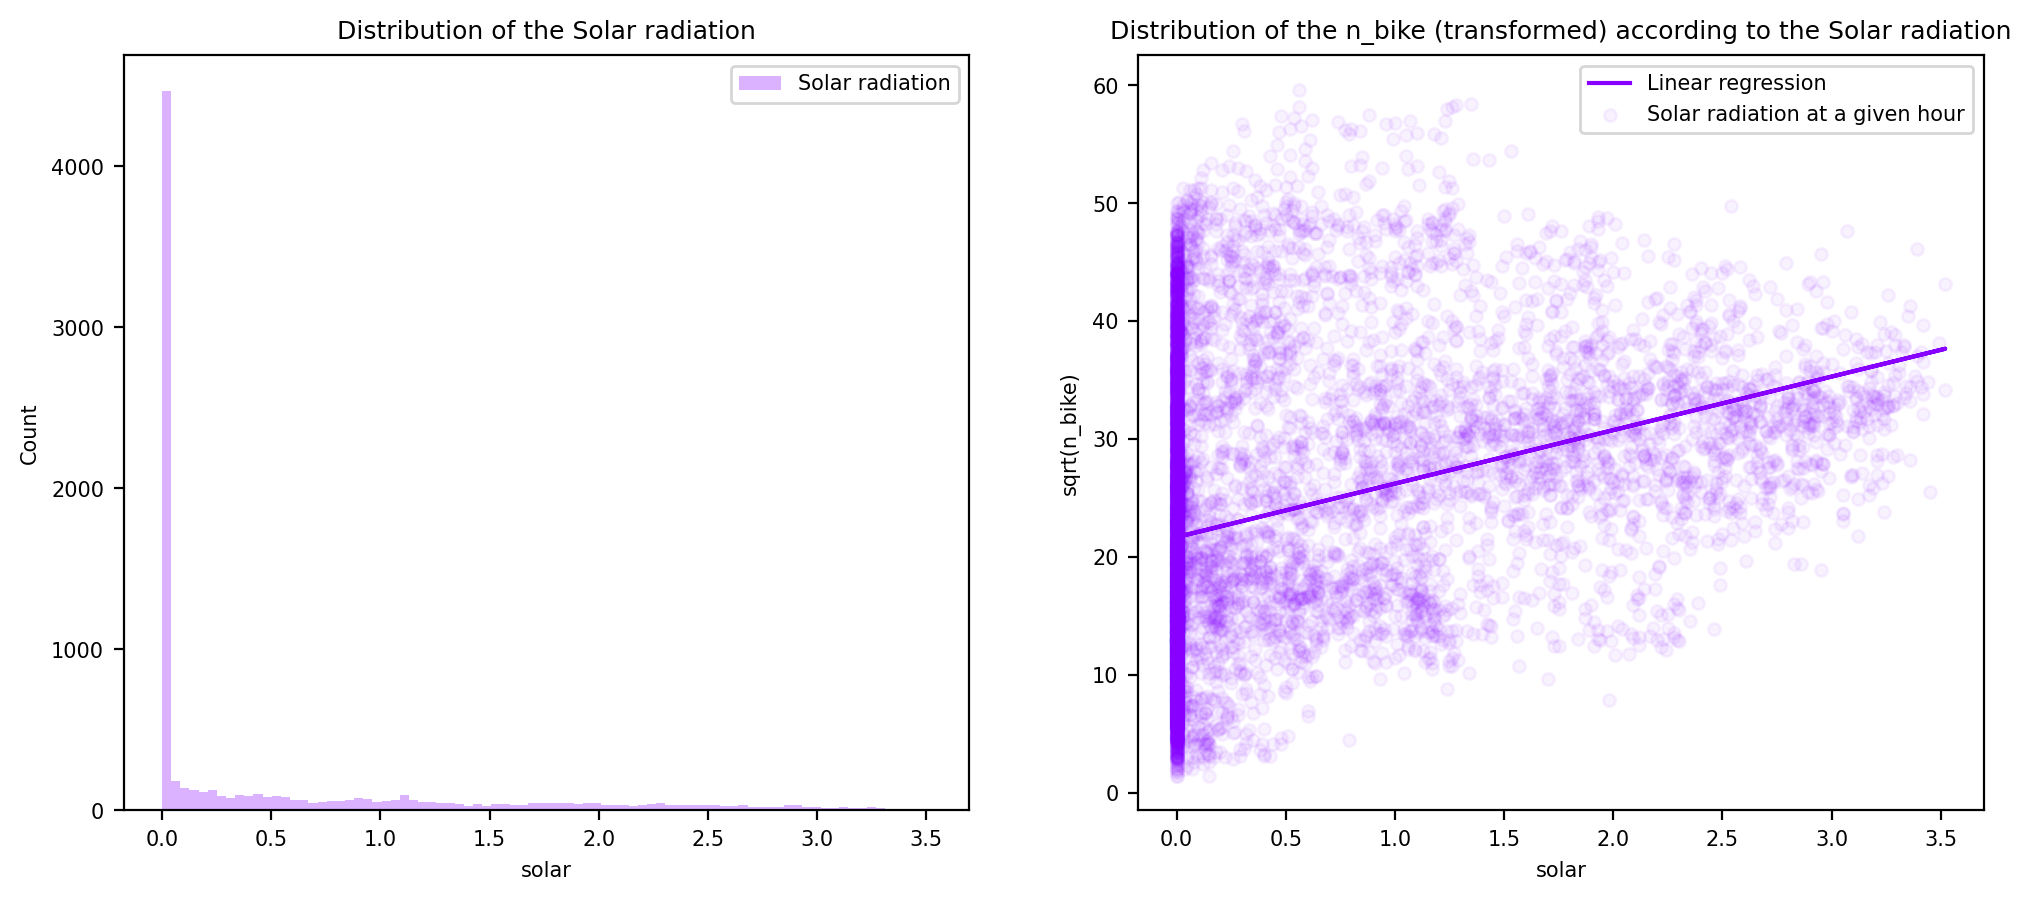

In [106]:
N = len(df) // 100

# Solar radiationdistributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df.solar, bins=N, color='#8800ff', alpha=0.3, label='Solar radiation')
# add legends
ax.set_title('Distribution of the Solar radiation')
ax.set_xlabel('solar')
ax.set_ylabel('Count')
ax.legend()

# Solar radiation and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='solar', y='n_bike', kind='scatter', color='#8800ff', alpha=0.05, label='Solar radiation at a given hour', ax=ax)
# add regression line
x, y = df.solar, df.n_bike
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#8800ff', label='Linear regression') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the Solar radiation')
ax.set_xlabel('solar')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
pass

Here three conclusions can be made :
   - The solar radiation is the more often \~zero, which means there is no sun
   - The more there are sun radiation, the more the bikers feel confortables so more bike rented.
   - (Hard to see because it is in small) The non\~zero solar radiation is right skewed.
    
So I will apply a square root transformation for two reasons :
   - I want to increase the gap between \~zero solar radiation and the other values
   - I want to have a better distribution of non\~zero values
   

In [107]:
df['solar'] = np.sqrt(df['solar'])

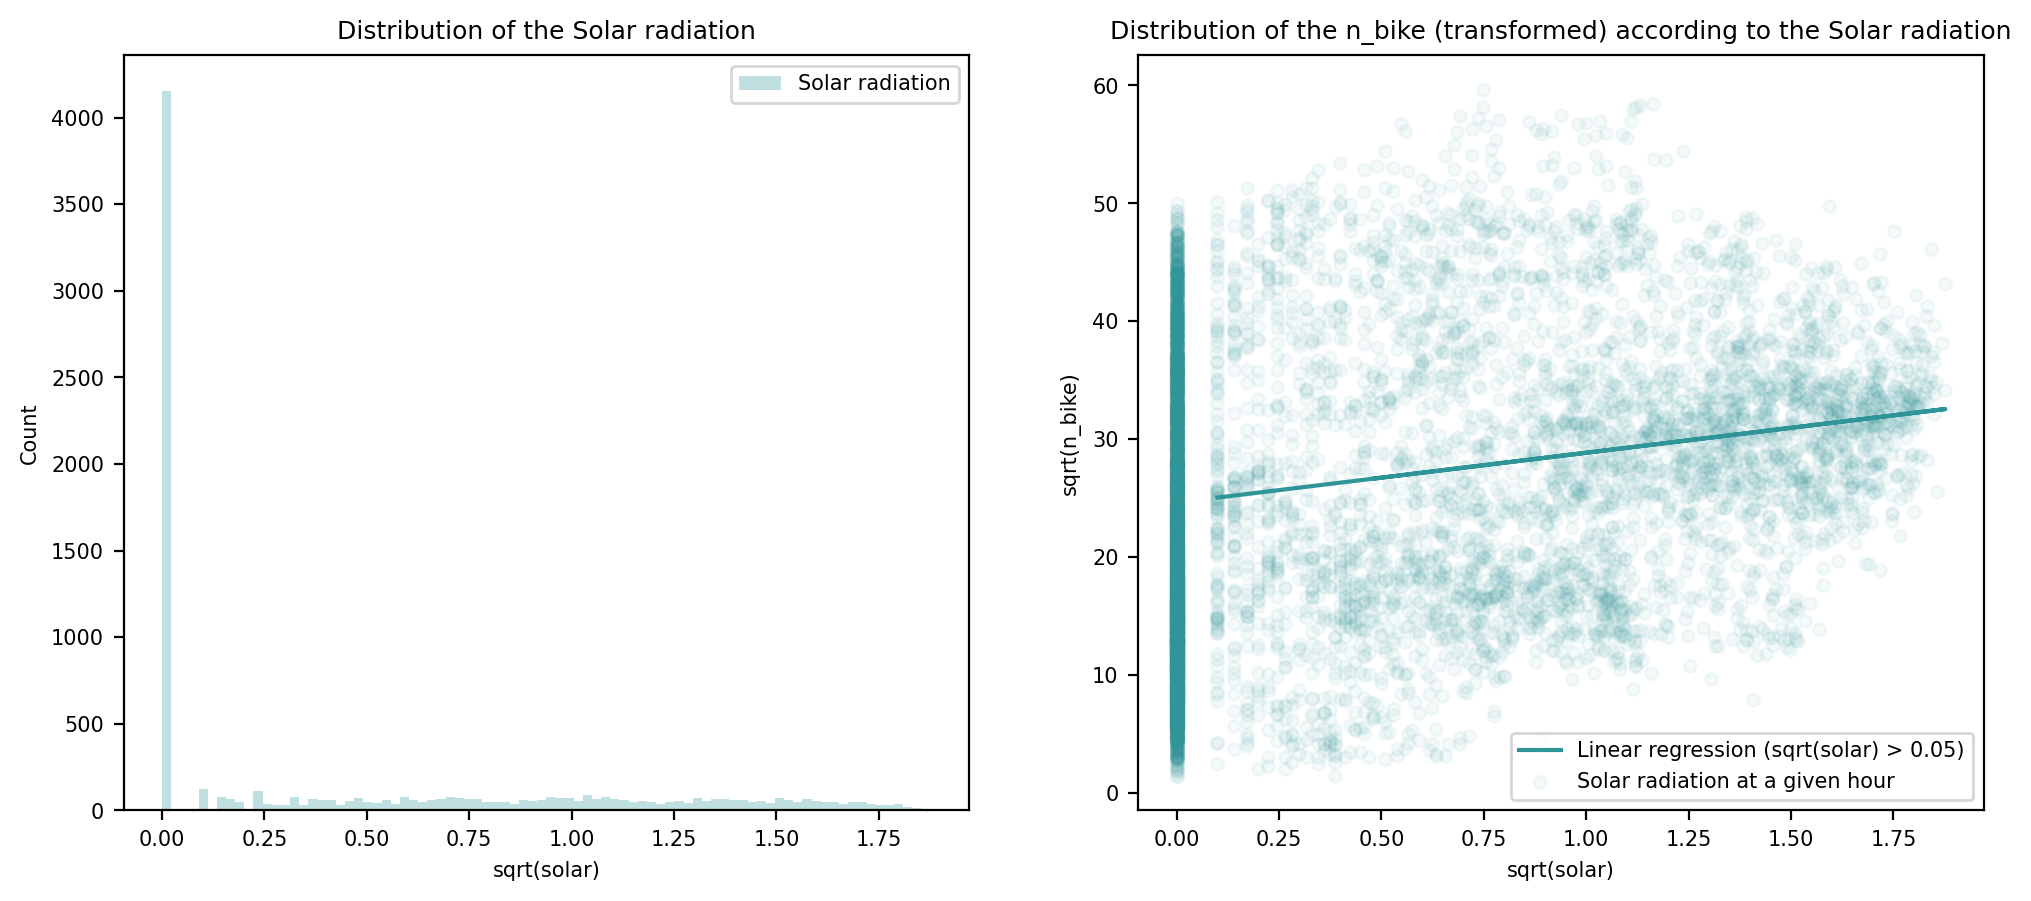

In [108]:
N = len(df) // 100

# Solar radiationdistributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df.solar, bins=N, color='#2f9599', alpha=0.3, label='Solar radiation')
# add legends
ax.set_title('Distribution of the Solar radiation')
ax.set_xlabel('sqrt(solar)')
ax.set_ylabel('Count')
ax.legend()

# Solar radiation and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='solar', y='n_bike', kind='scatter', color='#2f9599', alpha=0.05, label='Solar radiation at a given hour', ax=ax)
# add regression line
x, y = df[df.solar>0.05].solar, df[df.solar>0.05].n_bike
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#2f9599', label='Linear regression (sqrt(solar) > 0.05)') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the Solar radiation')
ax.set_xlabel('sqrt(solar)')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
pass

### Rainfall

The rainfall correspond (mm) to the rain fallen during the current hour. 
The more there are rain, the riskier riding is.

The rain fall is given by the rain fallen for a given our. So estimating the rain have a effect on dryness for 2 hours I will apply moving average of rainfall for the last 2 hours.

As I did for the others meteorological features, I plot the rainfall distribution to see if it need some transformation. Then the other plot is showing the relation between the rainfall and the number of bikes rented (already sqrt-transformed).

In [109]:
df['rain'] = df.rolling(2, min_periods=1)['rain'].mean()

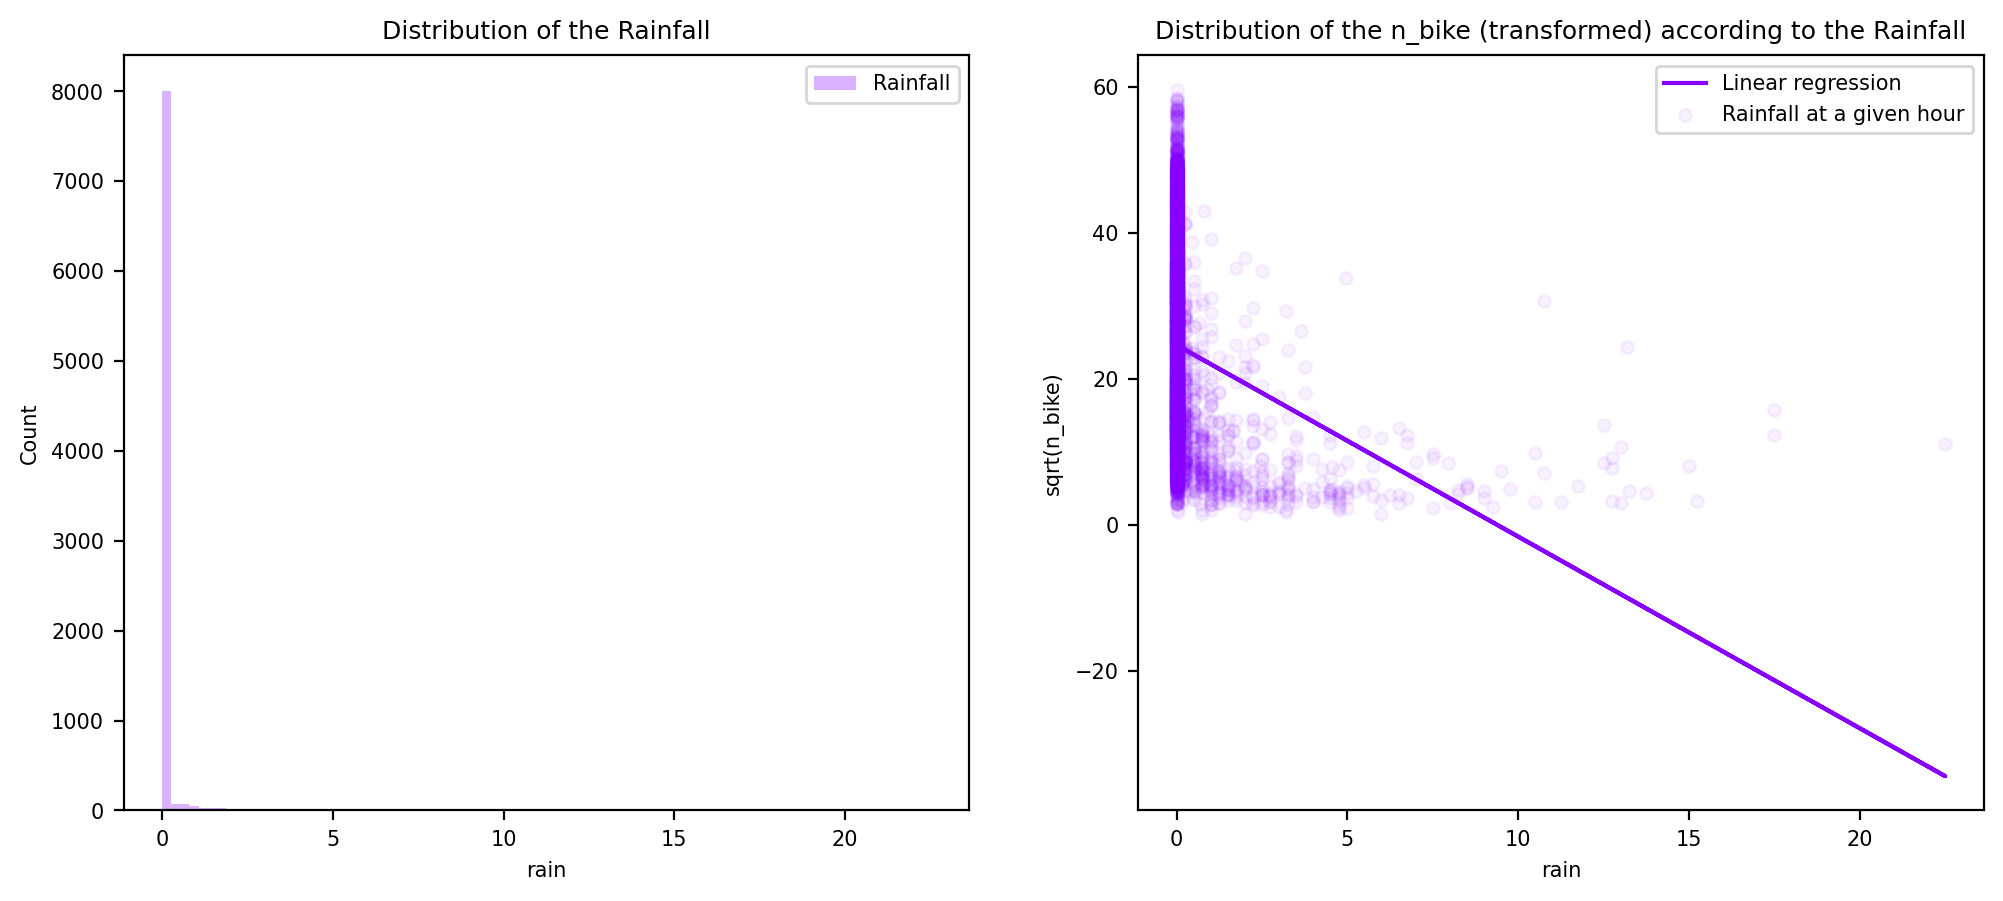

In [110]:
N = len(df) // 100

# Rainfall distributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df.rain, bins=N, color='#8800ff', alpha=0.3, label='Rainfall')
# add legends
ax.set_title('Distribution of the Rainfall')
ax.set_xlabel('rain')
ax.set_ylabel('Count')
ax.legend()

# Rainfall and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='rain', y='n_bike', kind='scatter', color='#8800ff', alpha=0.05, label='Rainfall at a given hour', ax=ax)
# add regression line
x, y = df.rain, df.n_bike
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#8800ff', label='Linear regression') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the Rainfall')
ax.set_xlabel('rain')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
pass

The plot showing the regression line is clearly indicates the more is it rainy, the less the bikes are used. But I can't clearly see the distribution when there are rain. Let's filter our plots on rainy hours. 

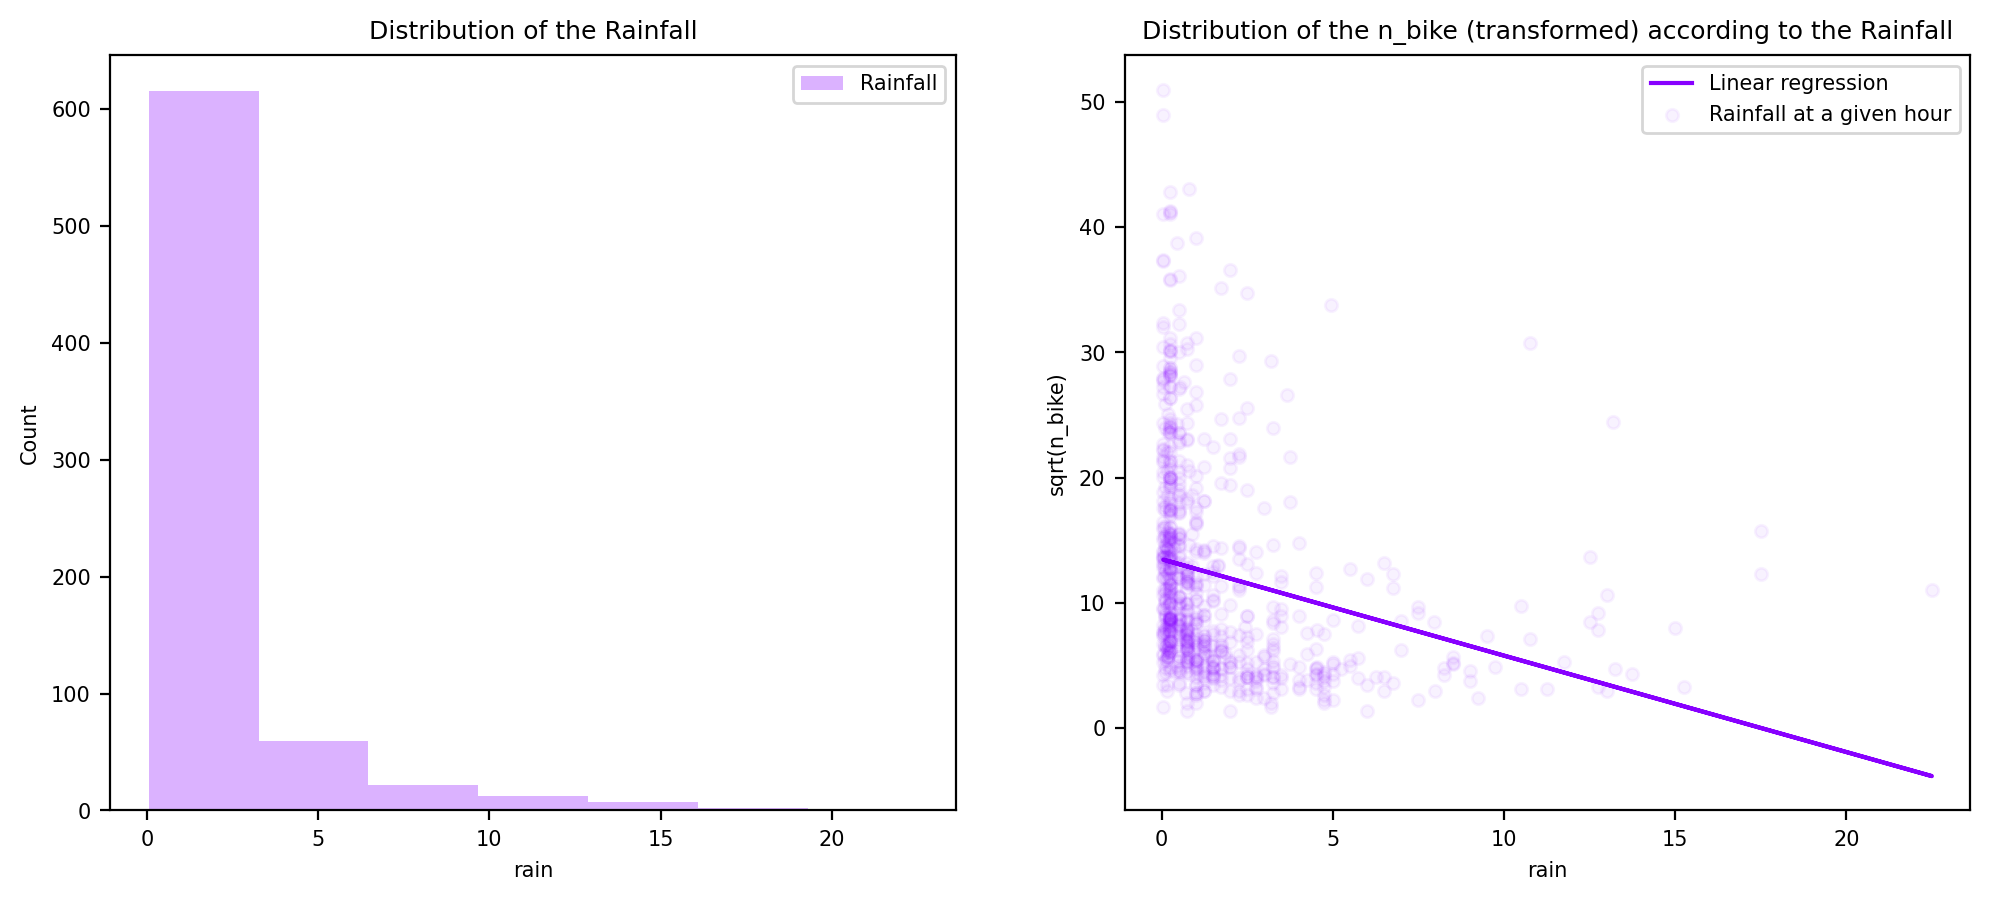

In [111]:
_df = df.copy()
_df = _df[_df.rain > 0]
N = len(_df) // 100

# Rainfall distributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=_df.rain, bins=N, color='#8800ff', alpha=0.3, label='Rainfall')
# add legends
ax.set_title('Distribution of the Rainfall')
ax.set_xlabel('rain')
ax.set_ylabel('Count')
ax.legend()

# Rainfall and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
_df.plot(x='rain', y='n_bike', kind='scatter', color='#8800ff', alpha=0.05, label='Rainfall at a given hour', ax=ax)
# add regression line
x, y = _df.rain, _df.n_bike
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#8800ff', label='Linear regression') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the Rainfall')
ax.set_xlabel('rain')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
pass

Here we can see, the rainy hours are really really right skewed. Moreover, we clearly see the inverse proportionnality with the number of rented bikes.
So we will try another feature *dryness* (1/mm) given by $$dryness = \frac{1}{rain + 1}$$ avoiding *ZeroDivisionError*.

In [112]:
df['dryness'] = 1 / (df.rain + 1)
df = df.drop('rain', axis=1)

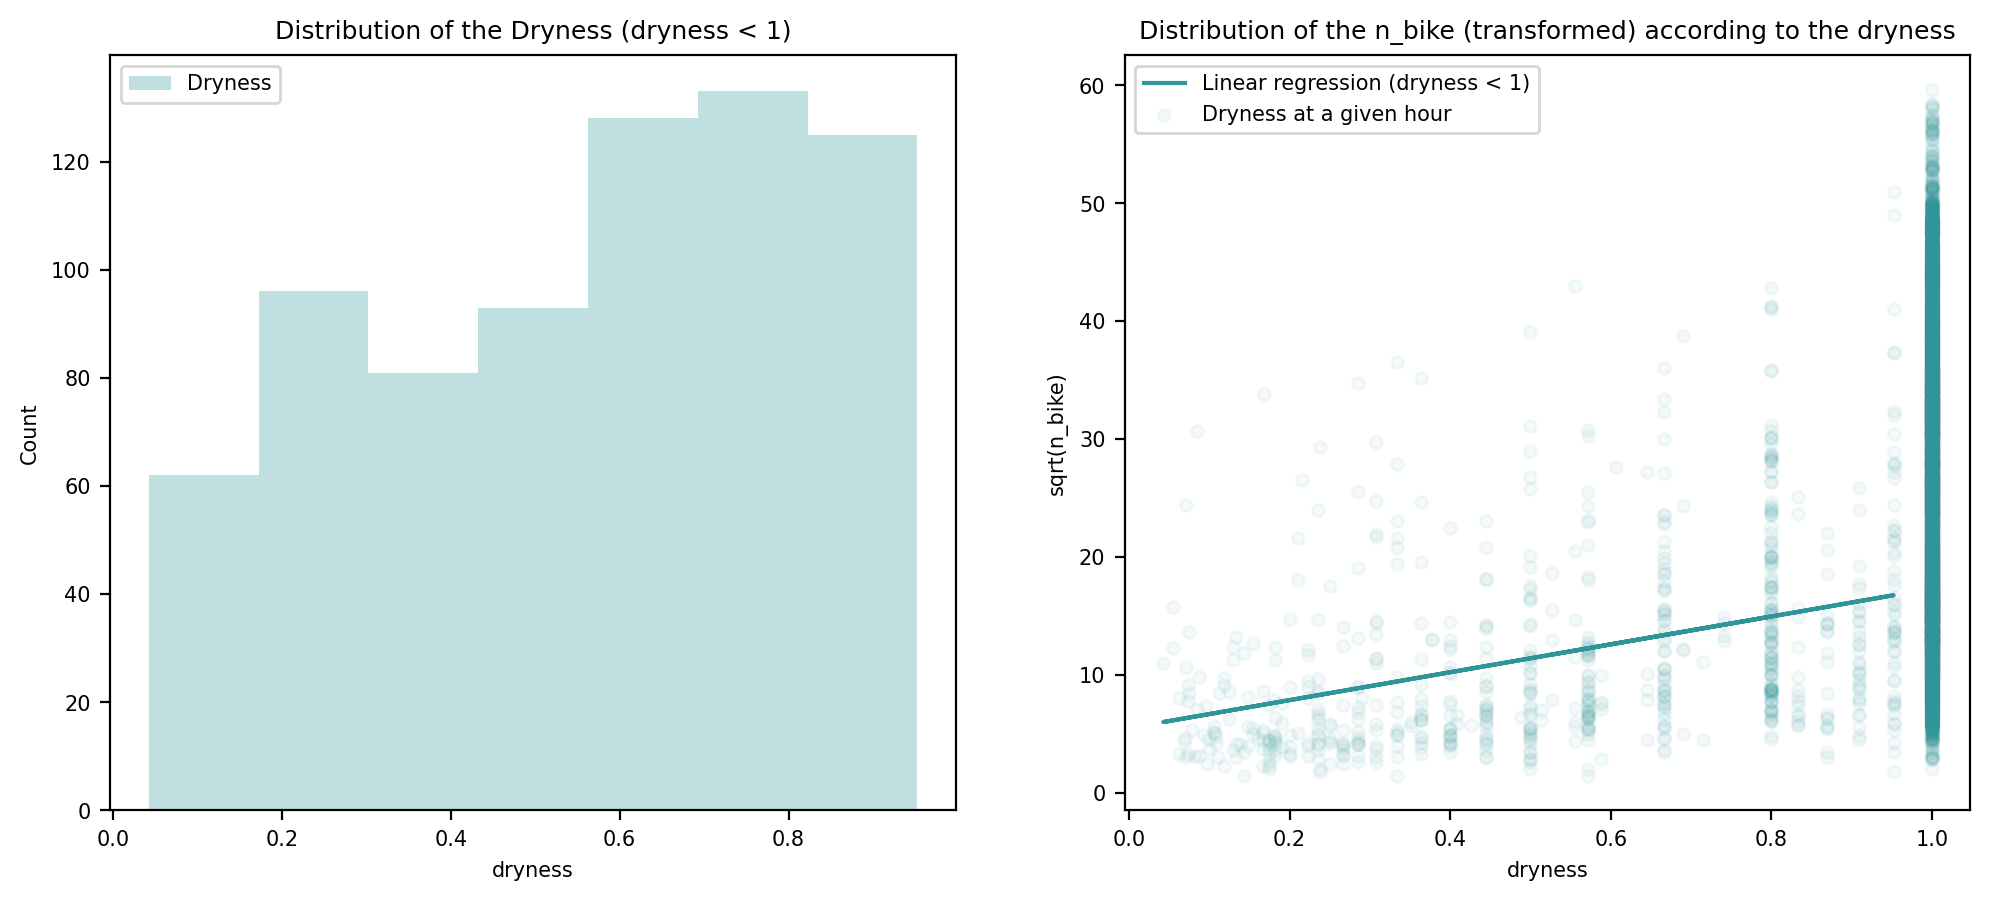

In [113]:
N = len(df[df.dryness < 1]) // 100

# Dryness distributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df[df.dryness < 1].dryness, bins=N, color='#2f9599', alpha=0.3, label='Dryness')
# add legends
ax.set_title('Distribution of the Dryness (dryness < 1)')
ax.set_xlabel('dryness')
ax.set_ylabel('Count')
ax.legend()

# Dryness and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='dryness', y='n_bike', kind='scatter', color='#2f9599', alpha=0.05, label='Dryness at a given hour', ax=ax)
# add regression line
x, y = df[df.dryness < 1].dryness, df[df.dryness < 1].n_bike
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#2f9599', label='Linear regression (dryness < 1)') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the dryness')
ax.set_xlabel('dryness')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
pass

It is a really interpretative transformation. I will keep it as :
- The dryness distribution (dryness < 1) is gaussian-like
- The drier, the more the bikes are rented.

### Snowfall

The snowfall correspond (mm) to the rain fallen during the current hour. The more there are rain, the riskier riding is.

The snow fall is given by the snow fallen for a given our. So estimating the snow have a effect on dryness for 8 hours in the city of Seoul I will apply moving average of snowfall for the last 8 hours.

I plot the snowfall distribution to see if it need some transformation. Then the other plot is showing the relation between the snowfall and the number of bikes rented (already sqrt-transformed).

In [114]:
df['snow'] = df.rolling(8, min_periods=1)['snow'].mean()

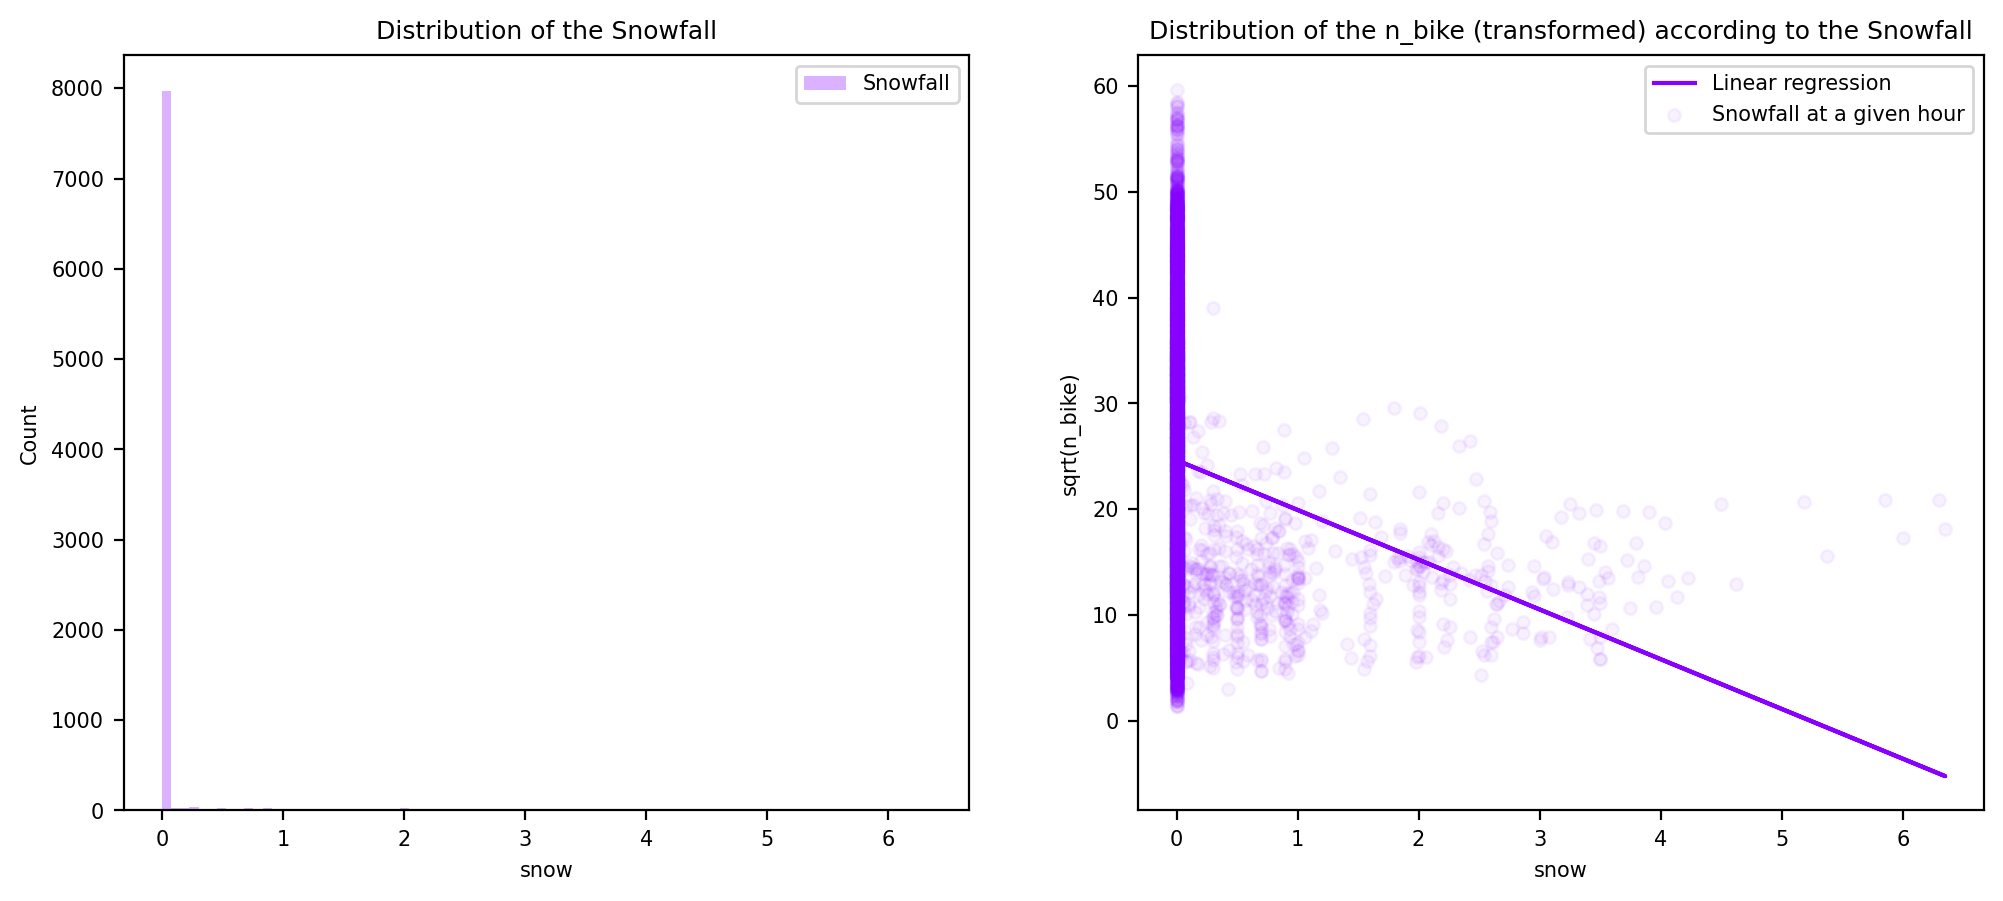

In [115]:
N = len(df) // 100

# Snowfall distributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df.snow, bins=N, color='#8800ff', alpha=0.3, label='Snowfall')
# add legends
ax.set_title('Distribution of the Snowfall')
ax.set_xlabel('snow')
ax.set_ylabel('Count')
ax.legend()

# Snowfall and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='snow', y='n_bike', kind='scatter', color='#8800ff', alpha=0.05, label='Snowfall at a given hour', ax=ax)
# add regression line
x, y = df.snow, df.n_bike
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#8800ff', label='Linear regression') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the Snowfall')
ax.set_xlabel('snow')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
pass

To be honest, I was thinking the rainfall and the snowfall will be the same. Of course, at first glance, we can conclude the snower, the more the bike will be rented. 
Yet looking more precisely, we see it is more a categorical variable. If there are 1 or 10 mm of snow, the number of bike rented seems to follow the same distribution. 
In other words, snow is like disqualifying. So I choose to transform this variable into a boolean one and see the results on a notch box plot

n_bike                                        
          count       sum  mean  min   max median   std
snowing                                                
0         289.0    4628.3  16.0  3.6  30.6   16.2   5.2
1        8176.0  200735.9  24.6  1.4  59.6   23.9  11.9

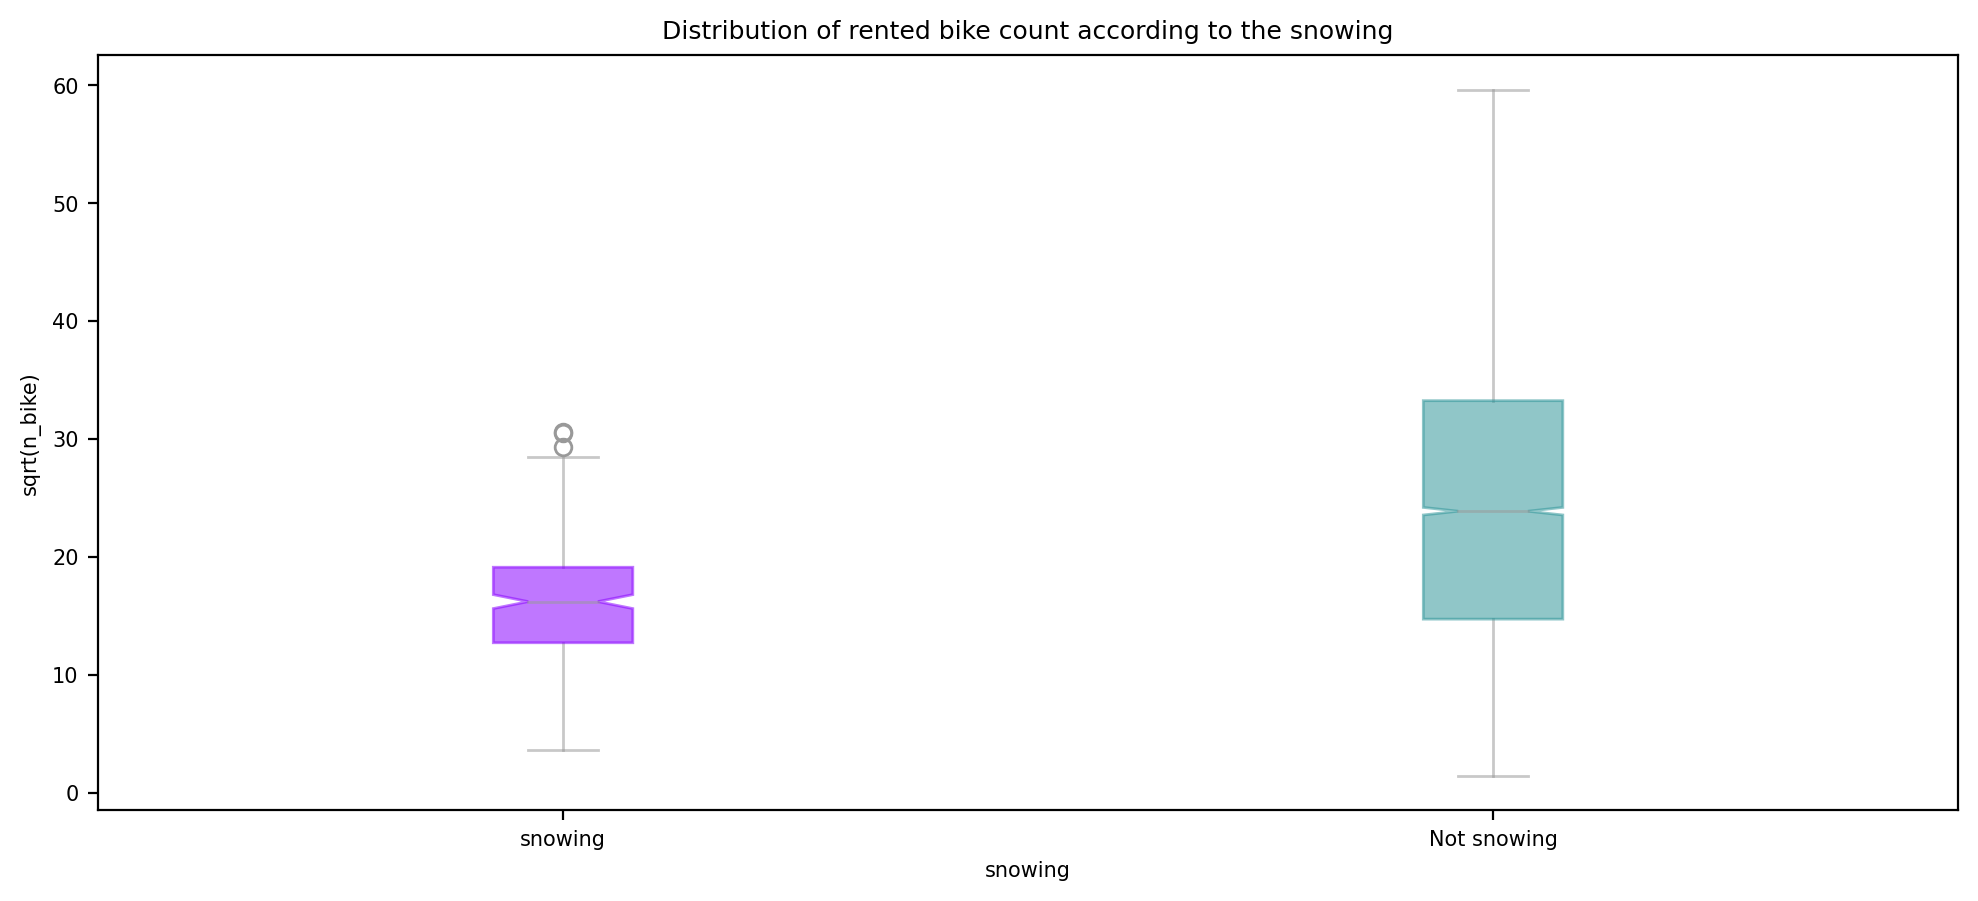

In [116]:
_df = df.copy()
_df['snowing'] = (_df.snow > 0).astype(np.int)

# group by snowing to get box plot
groups = _df.groupby(by=['snowing'], sort=False).n_bike
labels = ['snowing', 'Not snowing']
groups = [groups.get_group(k) for k in groups.groups]

# custom colors
gray_dict = dict(color='#99999988', markeredgecolor='#999999')
colors = ['#8800ff88', '#2f959988']
boxplot = plt.boxplot(
    groups, notch=True, vert=True, patch_artist=True, labels=labels,
    capprops=gray_dict, whiskerprops=gray_dict, flierprops=gray_dict, medianprops=gray_dict
)
# change box colors
for i, patch in enumerate(boxplot['boxes']):
    patch.set_color(colors[i%len(colors)])

plt.title('Distribution of rented bike count according to the snowing')
plt.xlabel('snowing')
plt.ylabel('sqrt(n_bike)')
# display multiple aggregates and remove the temporary columns
_df.groupby('snowing', sort=False).agg({'n_bike': ['count', 'sum', 'mean', 'min', 'max', 'median', 'std']}).apply(lambda row: [f'{x:.1f}' for x in row])


Indeed, we can see the distribution of number of bike rented is restricted. So the feature snowing is a great categorical features for snowy hours.

In [117]:
df['snowing'] = (df.snow > 0).astype(np.int)
df = df.drop('snow', axis=1)

### Visibility



I plot the visibility distribution to see if it need some transformation. Then the other plot is showing the relation between the visibility and the number of bikes rented (already sqrt-transformed).

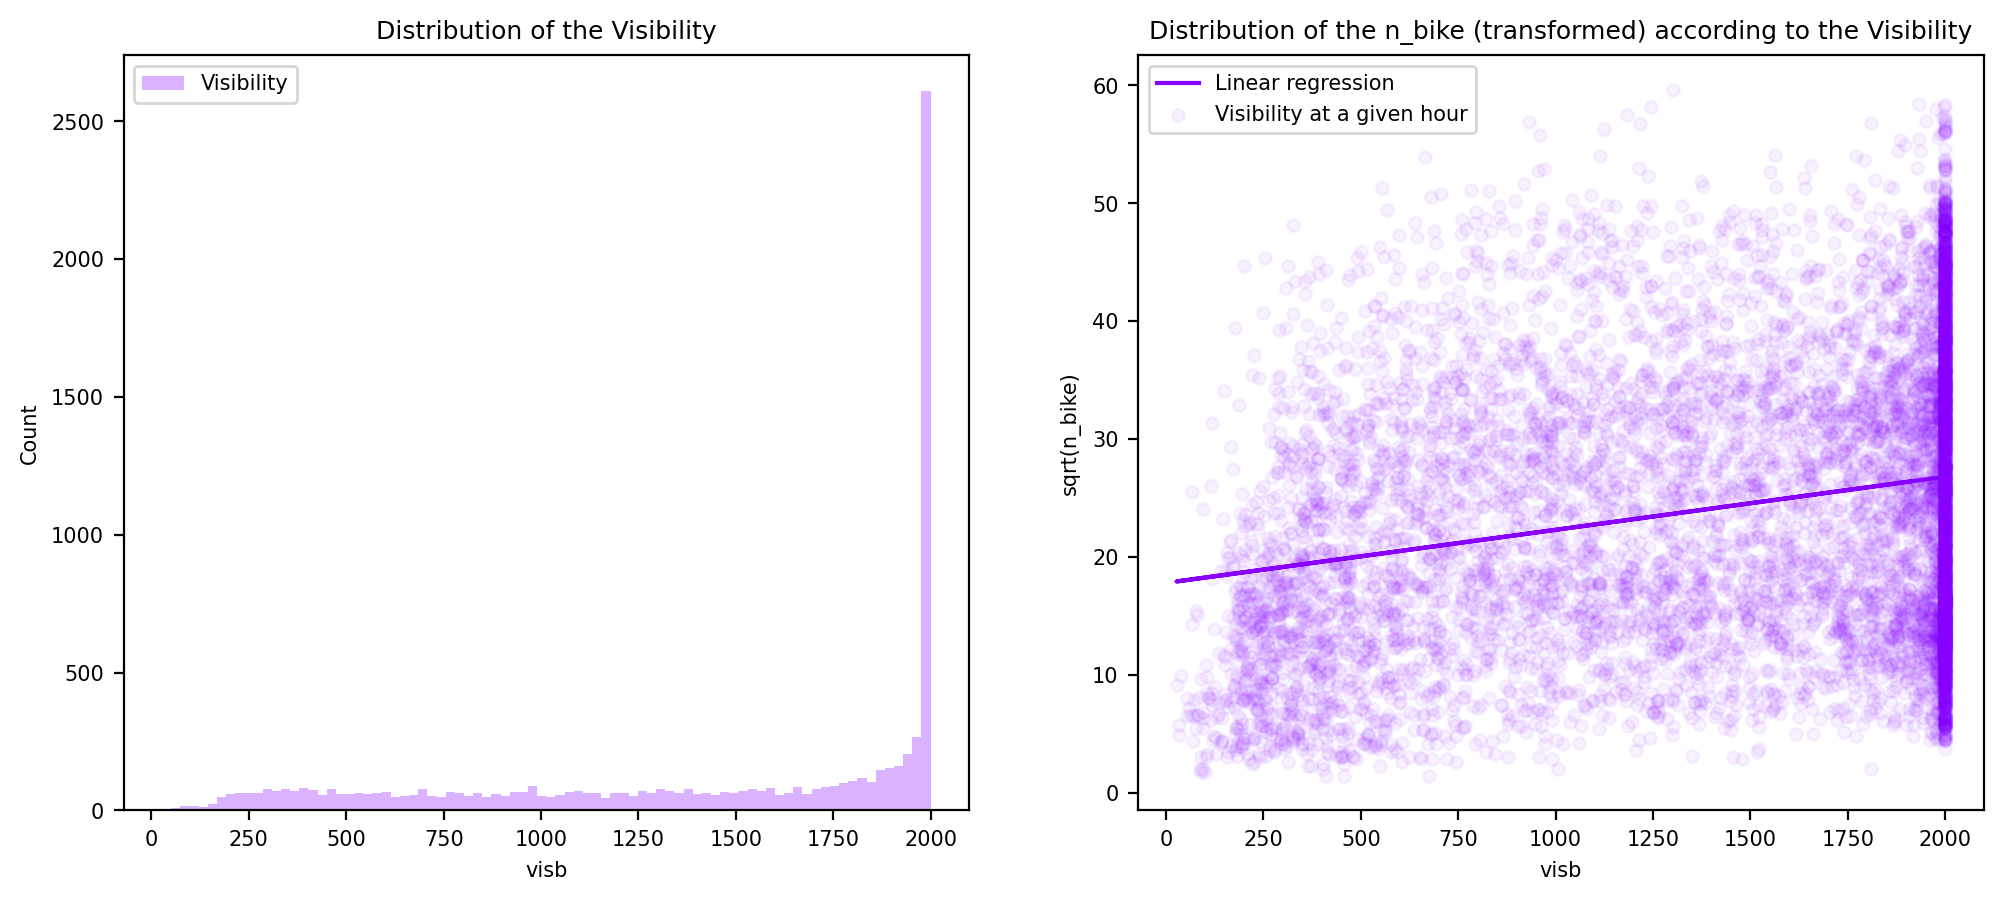

In [118]:
N = len(df) // 100

# Visibility distributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df.visb, bins=N, color='#8800ff', alpha=0.3, label='Visibility')
# add legends
ax.set_title('Distribution of the Visibility')
ax.set_xlabel('visb')
ax.set_ylabel('Count')
ax.legend()

# Visibility and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='visb', y='n_bike', kind='scatter', color='#8800ff', alpha=0.05, label='Visibility at a given hour', ax=ax)
# add regression line
x, y = df.visb, df.n_bike
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#8800ff', label='Linear regression') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the Visibility')
ax.set_xlabel('visb')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
pass

As we can see, the *visb* is by default at 2000 which is weird to interpret as a maximum visibility. 
So I decide to change the visibility feature to *invisb* which reverts the distribution. It will be interpreted as the removed (reduced) visibility (10m)

In [119]:
df['invisb'] = df.visb.max() - df.visb
df = df.drop('visb', axis=1)

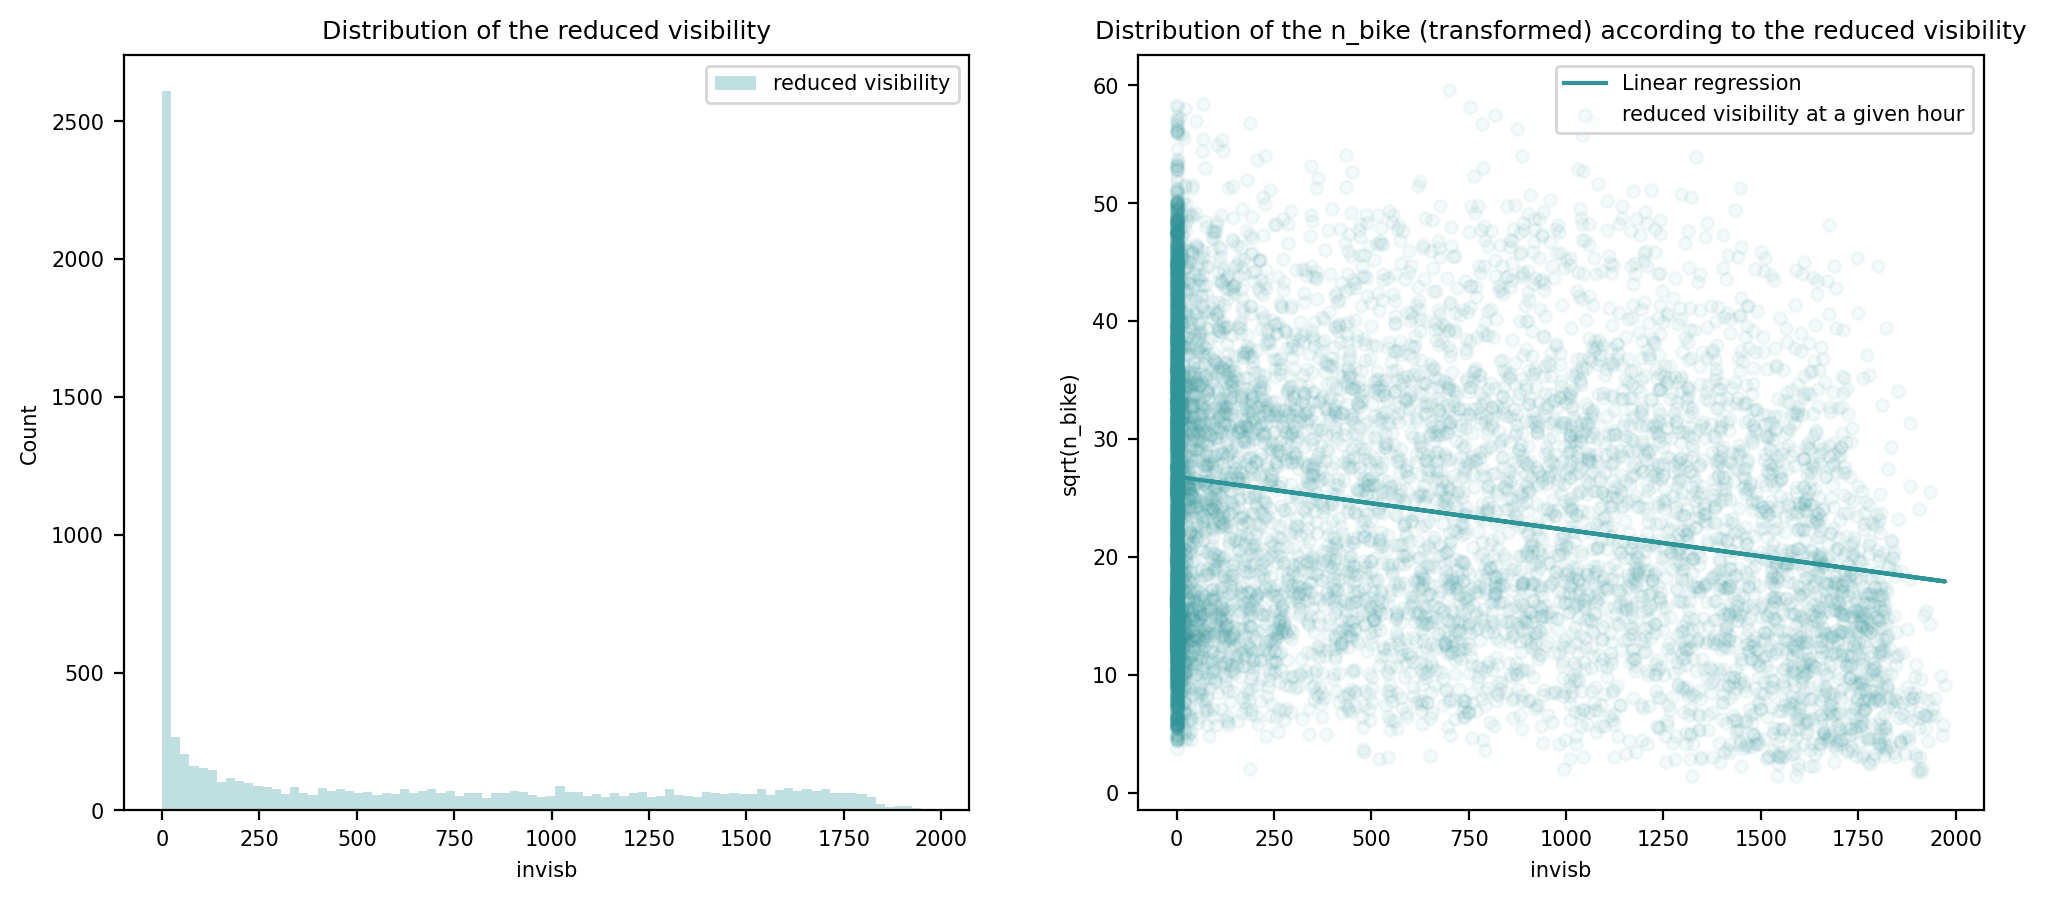

In [120]:
N = len(df) // 100

# reduced visibility distributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df.invisb, bins=N, color='#2f9599', alpha=0.3, label='reduced visibility')
# add legends
ax.set_title('Distribution of the reduced visibility')
ax.set_xlabel('invisb')
ax.set_ylabel('Count')
ax.legend()

# reduced visibility and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='invisb', y='n_bike', kind='scatter', color='#2f9599', alpha=0.05, label='reduced visibility at a given hour', ax=ax)
# add regression line
x, y = df.invisb, df.n_bike
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#2f9599', label='Linear regression') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the reduced visibility')
ax.set_xlabel('invisb')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
pass

Now it is easier to interpret. The more the visibility is reduced, the less the bikes are rented.

# Dataset preprocessing completion

Before completing the preprocessing of the dataset, I switch the variable containing this data from *df* to *data* and we can have a simple look at this data as a reminder.

In [121]:
data = df
data

n_bike  hour  temp  hum      wind   dew  solar  season  holiday  \
0     15.937377     0  -5.2   37  1.163151 -17.6    0.0  Winter        0   
1     14.282857     1  -5.5   38  0.587787 -17.6    0.0  Winter        0   
2     13.152946     2  -6.0   39  0.693147 -17.7    0.0  Winter        0   
3     10.344080     3  -6.2   40  0.641854 -17.6    0.0  Winter        0   
4      8.831761     4  -6.0   36  1.193922 -18.6    0.0  Winter        0   
...         ...   ...   ...  ...       ...   ...    ...     ...      ...   
8755  31.670175    19   4.2   34  1.280934 -10.3    0.0  Autumn        0   
8756  27.640550    20   3.4   37  1.193922  -9.9    0.0  Autumn        0   
8757  26.343880    21   2.6   39  0.262364  -9.9    0.0  Autumn        0   
8758  26.683328    22   2.1   41  0.693147  -9.8    0.0  Autumn        0   
8759  24.166092    23   1.9   43  0.832909  -9.3    0.0  Autumn        0   

      year     month  day week_day  working_day  dryness  snowing  invisb  
0     2017  December    1   Friday            1      1.0        0       0  
1     2017  December    1   Friday            1      1.0        0       0  
2     2017  December    1   Friday            1      1.0        0       0  
3     2017  December    1   Friday            1      1.0        0       0  
4     2017  December    1   Friday            1      1.0        0       0  
...    ...       ...  ...      ...          ...      ...      ...     ...  
8755  2018  November   30   Friday            1      1.0        1     106  
8756  2018  November   30   Friday            1      1.0        1       0  
8757  2018  November   30   Friday            1      1.0        1      32  
8758  2018  November   30   Friday            1      1.0        1     141  
8759  2018  November   30   Friday            1      1.0        1      91  

[8465 rows x 17 columns]

## Categorical features : One hot encoding 

Let's remember that holiday, working_day, snowing are already one hot encoded as they are boolean feautres. 
Only remains :
- hour
- season
- month
- day
- week_day

Important note : I save every dummies in a *dummies.json* file

In [122]:
categorical_columns = ['hour', 'season', 'month', 'day', 'week_day']
dummies = {}
for column in categorical_columns:
    unique = [str(x) for x in list(data[column].unique())]
    dummies[column] = unique
    
# save file
with open('dummies.json', 'w') as f:
    json.dump(dummies, f, indent=4)

In [123]:
def dummies_from_file(df, file_name):
    _df = df.copy()
    with open(file_name) as f:
         dummies = json.load(f)


    for column, values in dummies.items():
        for value in values:
            _df[f'{column}_{value}'] = (_df[column].astype(str) == value).astype(int)
        _df = _df.drop(column, axis=1)
    return _df
    
data = dummies_from_file(data, 'dummies.json')
data

n_bike  temp  hum      wind   dew  solar  holiday  year  working_day  \
0     15.937377  -5.2   37  1.163151 -17.6    0.0        0  2017            1   
1     14.282857  -5.5   38  0.587787 -17.6    0.0        0  2017            1   
2     13.152946  -6.0   39  0.693147 -17.7    0.0        0  2017            1   
3     10.344080  -6.2   40  0.641854 -17.6    0.0        0  2017            1   
4      8.831761  -6.0   36  1.193922 -18.6    0.0        0  2017            1   
...         ...   ...  ...       ...   ...    ...      ...   ...          ...   
8755  31.670175   4.2   34  1.280934 -10.3    0.0        0  2018            1   
8756  27.640550   3.4   37  1.193922  -9.9    0.0        0  2018            1   
8757  26.343880   2.6   39  0.262364  -9.9    0.0        0  2018            1   
8758  26.683328   2.1   41  0.693147  -9.8    0.0        0  2018            1   
8759  24.166092   1.9   43  0.832909  -9.3    0.0        0  2018            1   

      dryness  ...  day_29  day_30  day_31  week_day_Friday  \
0         1.0  ...       0       0       0                1   
1         1.0  ...       0       0       0                1   
2         1.0  ...       0       0       0                1   
3         1.0  ...       0       0       0                1   
4         1.0  ...       0       0       0                1   
...       ...  ...     ...     ...     ...              ...   
8755      1.0  ...       0       1       0                1   
8756      1.0  ...       0       1       0                1   
8757      1.0  ...       0       1       0                1   
8758      1.0  ...       0       1       0                1   
8759      1.0  ...       0       1       0                1   

      week_day_Saturday  week_day_Sunday  week_day_Monday  week_day_Tuesday  \
0                     0                0                0                 0   
1                     0                0                0                 0   
2                     0                0                0                 0   
3                     0                0                0                 0   
4                     0                0                0                 0   
...                 ...              ...              ...               ...   
8755                  0                0                0                 0   
8756                  0                0                0                 0   
8757                  0                0                0                 0   
8758                  0                0                0                 0   
8759                  0                0                0                 0   

      week_day_Wednesday  week_day_Thursday  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0  
...                  ...                ...  
8755                   0                  0  
8756                   0                  0  
8757                   0                  0  
8758                   0                  0  
8759                   0                  0  

[8465 rows x 90 columns]

## Numerical features : Normalization and Standardization

Now we have all our categorical features ready to use. Let's plot the histogram and describe the numerical ones as a reminder.

n_bike         temp          hum         wind          dew  \
count  8465.000000  8465.000000  8465.000000  8465.000000  8465.000000   
mean     24.260382    12.771057    58.147194     0.933634     3.944997   
std      11.857802    12.104375    20.484839     0.372602    13.242399   
min       1.414214   -17.800000     0.000000     0.000000   -30.600000   
25%      14.628739     3.000000    42.000000     0.641854    -5.100000   
50%      23.280893    13.500000    57.000000     0.916291     4.700000   
75%      32.924155    22.700000    74.000000     1.193922    15.200000   
max      59.632206    39.400000    98.000000     2.128232    27.200000   

             solar      dryness  
count  8465.000000  8465.000000  
mean      0.478287     0.962852  
std       0.582365     0.144701  
min       0.000000     0.042553  
25%       0.000000     1.000000  
50%       0.100000     1.000000  
75%       0.964365     1.000000  
max       1.876166     1.000000

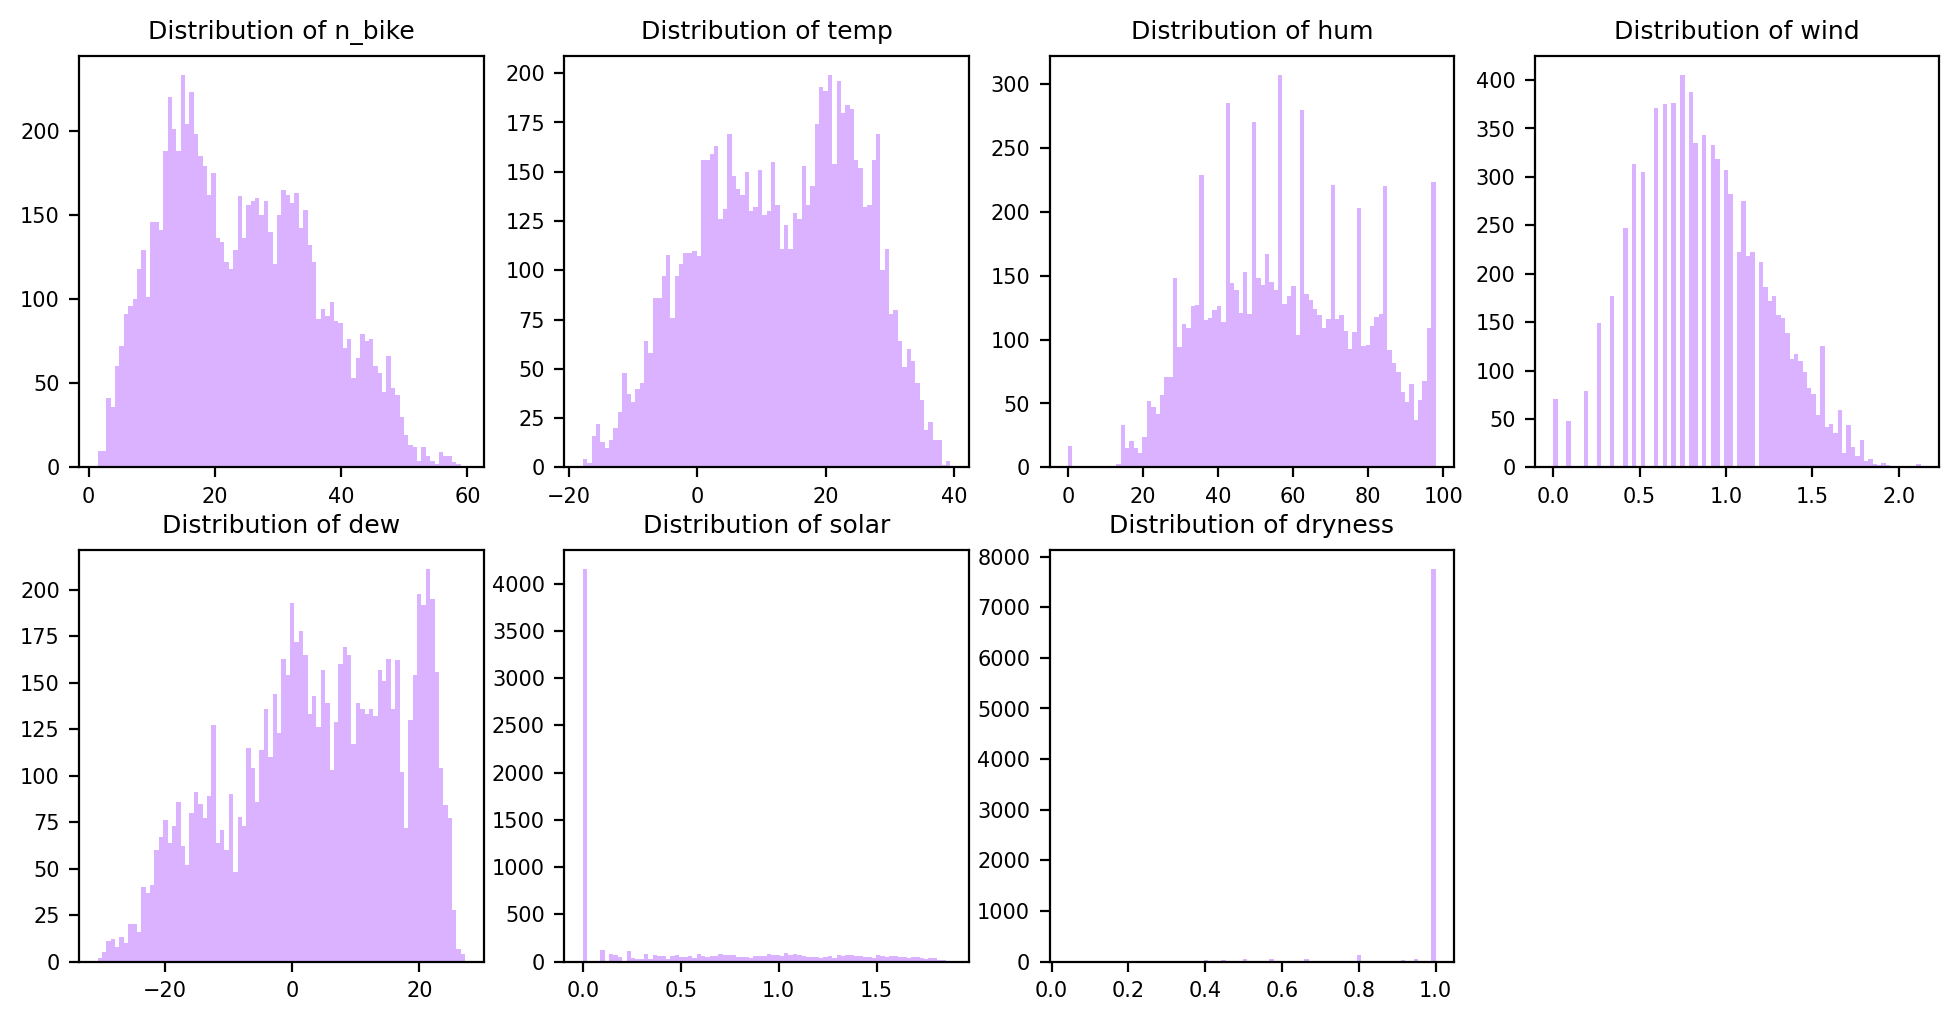

In [124]:
N = len(data) // 100
numerical_columns = ['n_bike', 'temp', 'hum', 'wind', 'dew', 'solar', 'dryness']

plt.rcParams['figure.figsize'] = [12, 6] # default = [6.0, 4.0]
fig, axes = plt.subplots(2, 4)
axes = axes.flatten()
axes[-1].remove()
for column, ax in zip(numerical_columns, axes):
    ax.hist(x=data[column], bins=N, color='#8800ff', alpha=0.3)
    # add legends
    ax.set_title(f'Distribution of {column}')

plt.rcParams['figure.figsize'] = [12, 5] # default = [6.0, 4.0]
    
data[numerical_columns].describe()

The humidity, and the dryness are in a given interval ([0, 100] and [0, 1]) so I will normalize these features. 
I will also normalize the solar feature as I want to keep the 0 value the same.

Remains the number of bike, the temperature, the dew point and the wind I will standardize. 
Particular point for n_bike : I put the mean and std in variables to unfit it later on predictions. 
And I saved the transformation applied in a *transformations.json* file

In [125]:
MEAN_LOG_N_BIKE = data.n_bike.mean()
STD_LOG_N_BIKE = data.n_bike.std()
print(f'MEAN_LOG_N_BIKE: {MEAN_LOG_N_BIKE:.2f}')
print(f'STD_LOG_N_BIKE: {STD_LOG_N_BIKE:.2f}')

transformations = {}
# standardization
for column in ['n_bike', 'temp', 'wind', 'dew']:
    mean, std = data[column].mean(), data[column].std()
    transformations[column] = {'function' : 'standardization', 'mean': float(mean), 'std': float(std)}

    
# Normalization
for column in ['hum', 'solar', 'dryness']:
    maxi = data[column].max()
    transformations[column] = {'function' : 'normalization', 'maxi': float(maxi)}

# save file
with open('transformations.json', 'w') as f:
    json.dump(transformations, f, indent=4)

MEAN_LOG_N_BIKE: 24.26
STD_LOG_N_BIKE: 11.86


In [126]:
def norm_from_file(df, file_name):
    _df = df.copy()
    with open(file_name) as f:
         transformations = json.load(f)


    for column, t in transformations.items():
        if t['function'] == 'standardization':
            _df[column] = (_df[column] - t['mean']) / t['std']
        elif t['function'] == 'normalization':
            _df[column] = _df[column] / t['maxi']

    return _df

data = norm_from_file(data, 'transformations.json')
data

n_bike      temp       hum      wind       dew  solar  holiday  year  \
0    -0.701901 -1.484675  0.377551  0.615985 -1.626971    0.0        0  2017   
1    -0.841431 -1.509459  0.387755 -0.928195 -1.626971    0.0        0  2017   
2    -0.936720 -1.550766  0.397959 -0.645425 -1.634522    0.0        0  2017   
3    -1.173599 -1.567289  0.408163 -0.783088 -1.626971    0.0        0  2017   
4    -1.301137 -1.550766  0.367347  0.698571 -1.702486    0.0        0  2017   
...        ...       ...       ...       ...       ...    ...      ...   ...   
8755  0.624888 -0.708096  0.346939  0.932095 -1.075711    0.0        0  2018   
8756  0.285059 -0.774188  0.377551  0.698571 -1.045505    0.0        0  2018   
8757  0.175707 -0.840279  0.397959 -1.801574 -1.045505    0.0        0  2018   
8758  0.204333 -0.881587  0.418367 -0.645425 -1.037954    0.0        0  2018   
8759 -0.007952 -0.898110  0.438776 -0.270328 -1.000196    0.0        0  2018   

      working_day  dryness  ...  day_29  day_30  day_31  week_day_Friday  \
0               1      1.0  ...       0       0       0                1   
1               1      1.0  ...       0       0       0                1   
2               1      1.0  ...       0       0       0                1   
3               1      1.0  ...       0       0       0                1   
4               1      1.0  ...       0       0       0                1   
...           ...      ...  ...     ...     ...     ...              ...   
8755            1      1.0  ...       0       1       0                1   
8756            1      1.0  ...       0       1       0                1   
8757            1      1.0  ...       0       1       0                1   
8758            1      1.0  ...       0       1       0                1   
8759            1      1.0  ...       0       1       0                1   

      week_day_Saturday  week_day_Sunday  week_day_Monday  week_day_Tuesday  \
0                     0                0                0                 0   
1                     0                0                0                 0   
2                     0                0                0                 0   
3                     0                0                0                 0   
4                     0                0                0                 0   
...                 ...              ...              ...               ...   
8755                  0                0                0                 0   
8756                  0                0                0                 0   
8757                  0                0                0                 0   
8758                  0                0                0                 0   
8759                  0                0                0                 0   

      week_day_Wednesday  week_day_Thursday  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0  
...                  ...                ...  
8755                   0                  0  
8756                   0                  0  
8757                   0                  0  
8758                   0                  0  
8759                   0                  0  

[8465 rows x 90 columns]

n_bike          temp          hum          wind           dew  \
count  8.465000e+03  8.465000e+03  8465.000000  8.465000e+03  8.465000e+03   
mean   3.004811e-15  2.729588e-16     0.593339 -4.329279e-14  3.653624e-15   
std    1.000000e+00  1.000000e+00     0.209029  1.000000e+00  1.000000e+00   
min   -1.926678e+00 -2.525621e+00     0.000000 -2.505715e+00 -2.608666e+00   
25%   -8.122621e-01 -8.072335e-01     0.428571 -7.830879e-01 -6.830331e-01   
50%   -8.260290e-02  6.022143e-02     0.581633 -4.654579e-02  5.701406e-02   
75%    7.306391e-01  8.202772e-01     0.755102  6.985709e-01  8.499218e-01   
max    2.983000e+00  2.199944e+00     1.000000  3.206099e+00  1.756102e+00   

             solar      dryness  
count  8465.000000  8465.000000  
mean      0.254928     0.962852  
std       0.310402     0.144701  
min       0.000000     0.042553  
25%       0.000000     1.000000  
50%       0.053300     1.000000  
75%       0.514008     1.000000  
max       1.000000     1.000000

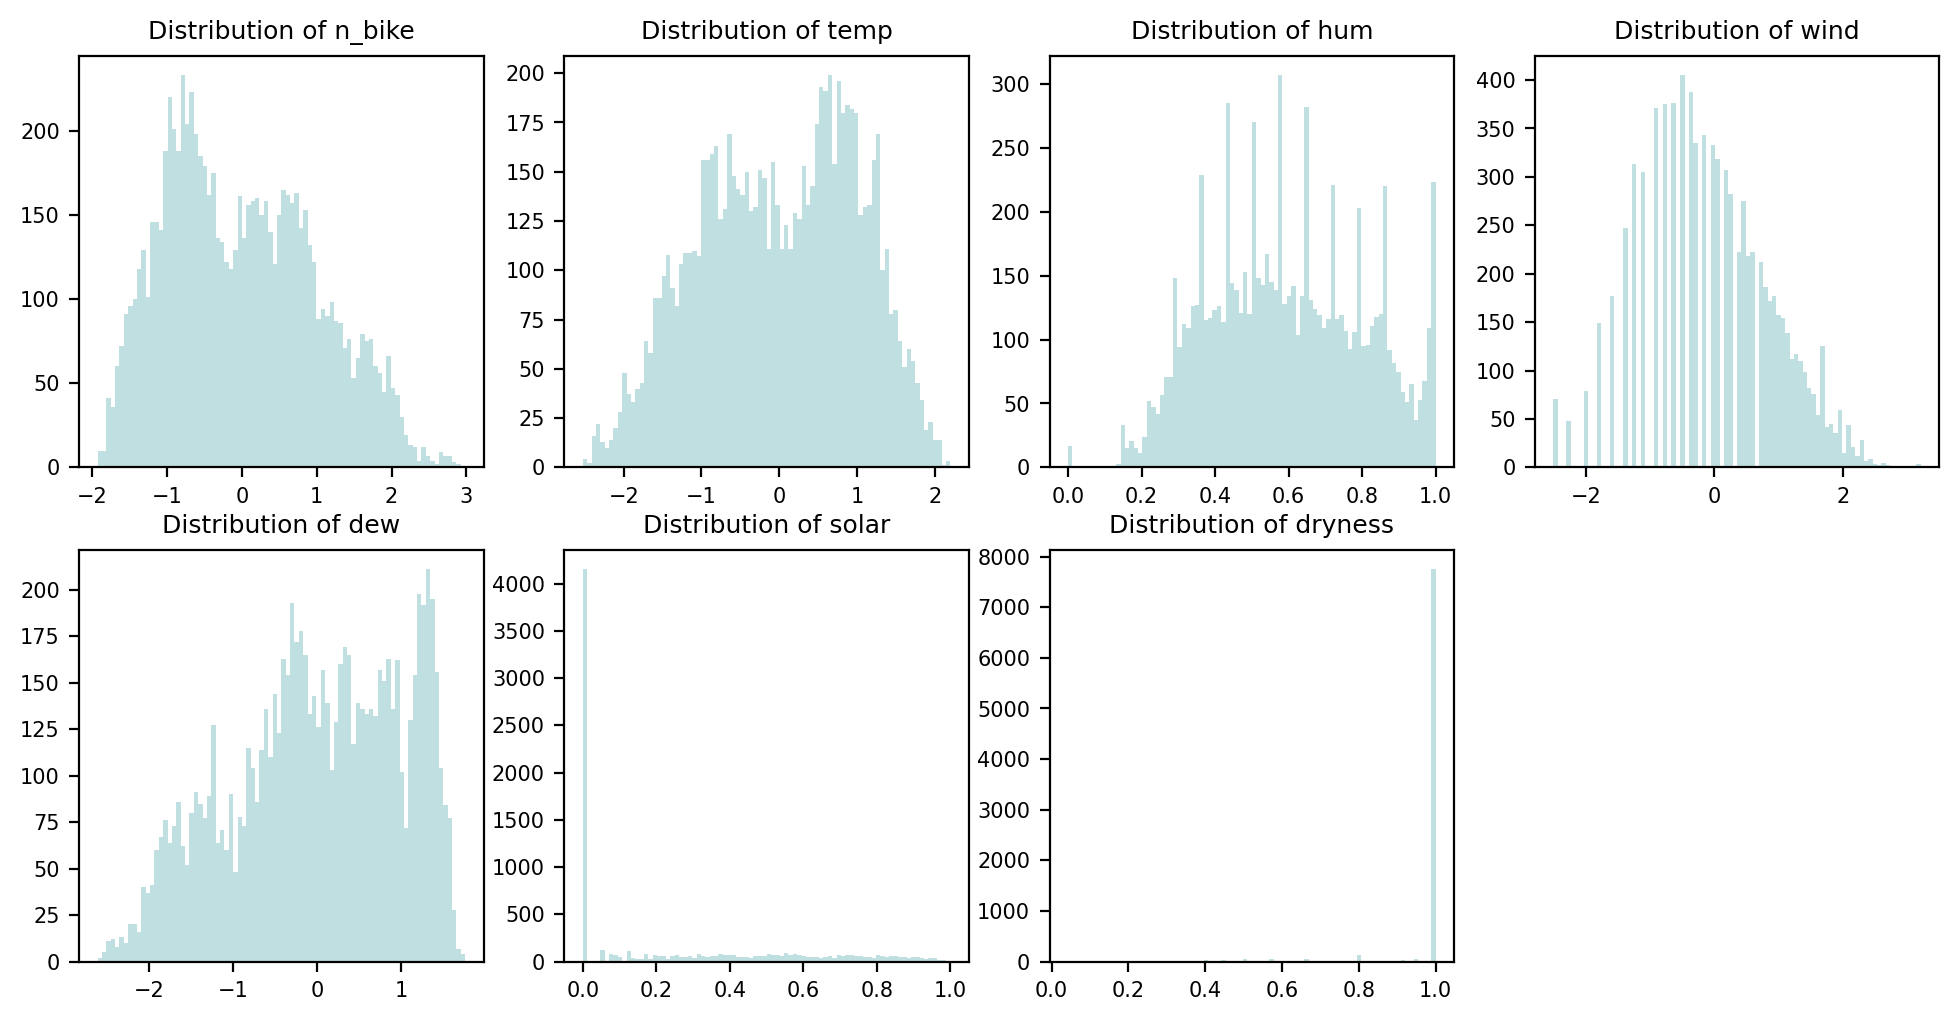

In [127]:
N = len(data) // 100
numerical_columns = ['n_bike', 'temp', 'hum', 'wind', 'dew', 'solar', 'dryness']

plt.rcParams['figure.figsize'] = [12, 6] # default = [6.0, 4.0]
fig, axes = plt.subplots(2, 4)
axes = axes.flatten()
axes[-1].remove()
for column, ax in zip(numerical_columns, axes):
    ax.hist(x=data[column], bins=N, color='#2f9599', alpha=0.3)
    # add legends
    ax.set_title(f'Distribution of {column}')

plt.rcParams['figure.figsize'] = [12, 5] # default = [6.0, 4.0]
    
data[numerical_columns].describe()

## Train-test split

In [128]:
X, y = data.drop('n_bike', axis=1), data['n_bike']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (5925, 89)
y_train shape: (5925,)
X_test shape: (2540, 89)
y_test shape: (2540,)


In [129]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [130]:
regressor.coef_

array([ 2.91509315e-01, -8.86303547e-01, -9.38511638e-03,  2.02293865e-01,
        5.11164344e-01, -2.26816742e-01, -8.93044267e+08, -4.51972223e+08,
        1.83020459e+00, -1.16831471e-01, -7.19680813e-05,  6.56471586e+07,
        6.56471584e+07,  6.56471581e+07,  6.56471579e+07,  6.56471577e+07,
        6.56471577e+07,  6.56471581e+07,  6.56471587e+07,  6.56471592e+07,
        6.56471585e+07,  6.56471582e+07,  6.56471582e+07,  6.56471583e+07,
        6.56471583e+07,  6.56471583e+07,  6.56471584e+07,  6.56471586e+07,
        6.56471589e+07,  6.56471595e+07,  6.56471592e+07,  6.56471591e+07,
        6.56471592e+07,  6.56471591e+07,  6.56471587e+07, -3.90420363e+08,
       -2.47731068e+08, -2.18503227e+08,  7.04590641e+06, -6.18960683e+08,
        2.74083584e+08,  2.74083584e+08,  1.31394289e+08,  1.31394289e+08,
        1.31394289e+08,  1.02166449e+08,  1.02166448e+08,  1.02166448e+08,
       -1.23382685e+08, -1.23382685e+08, -1.23382685e+08,  2.52724559e+07,
        2.52724558e+07,  

In [131]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [132]:
from sklearn.metrics import mean_squared_error,r2_score

In [133]:
import math
math.sqrt(mean_squared_error(y_test, y_pred))

0.43931931061866414

In [134]:
r2_score(y_test, y_pred)

0.8031838804842141

In [135]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [136]:
#Residual = Actual value - Predicted value

residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

In [137]:
import seaborn as sns

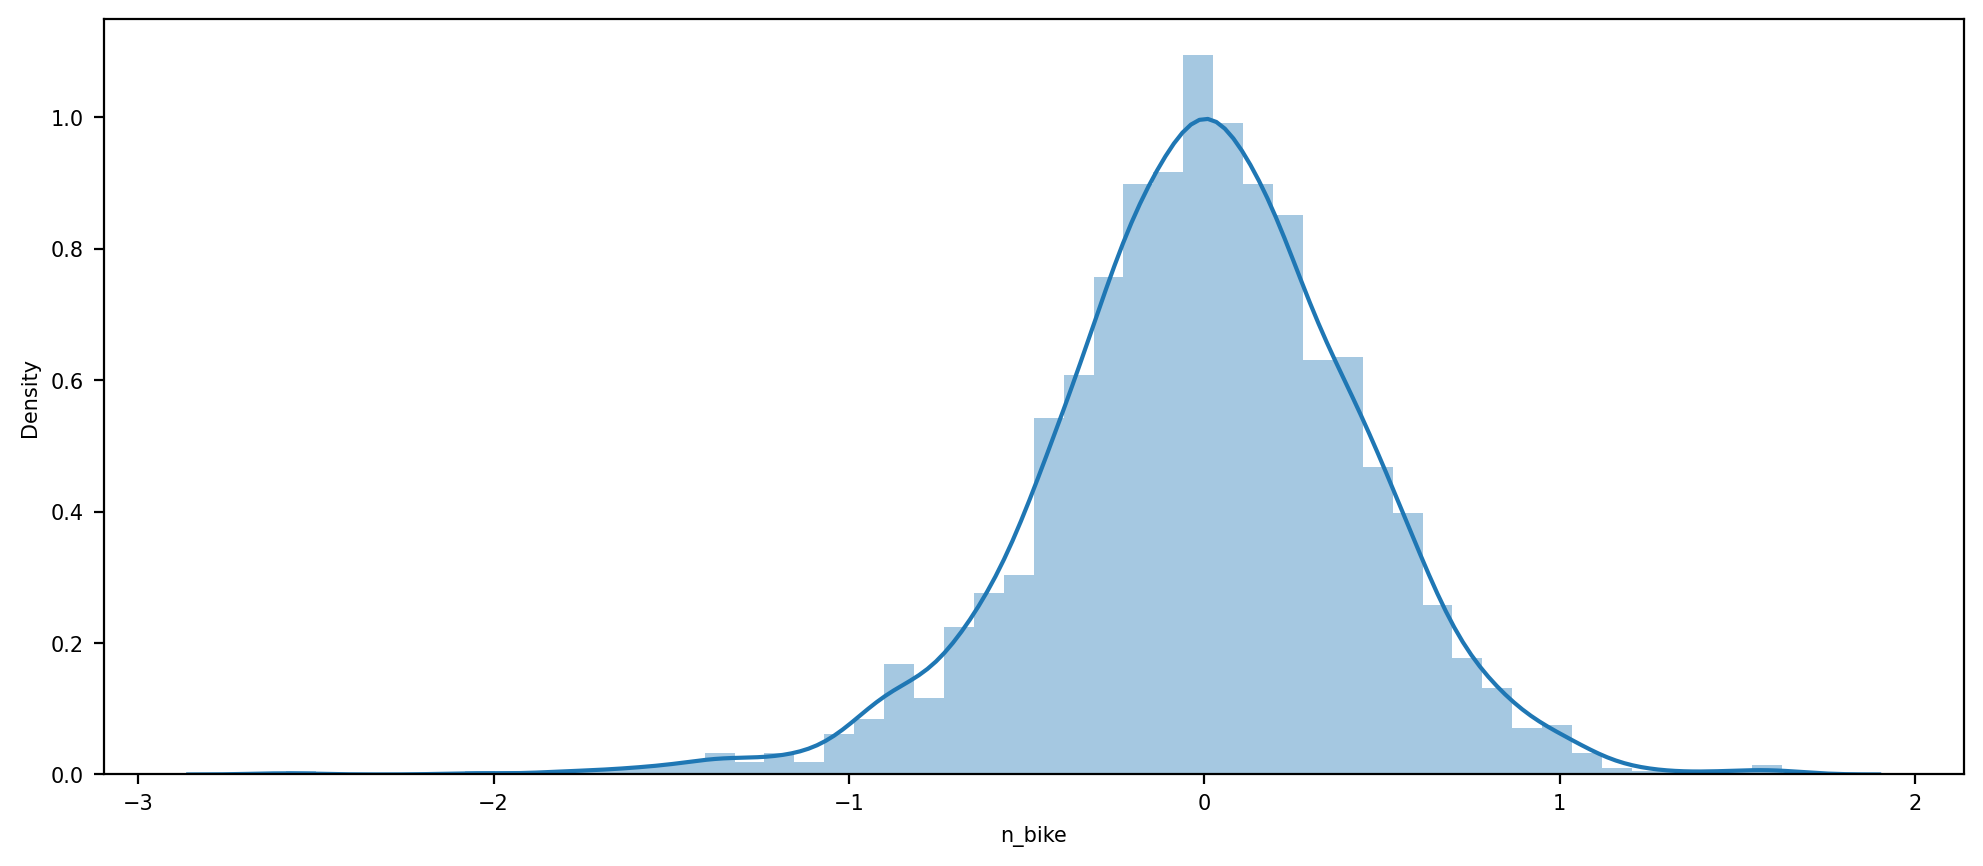

In [138]:
#Validating if the residuals are normally distributed
sns.distplot(residuals_test)

In [139]:
#From the above it is clear that residuals are normally distributed

In [140]:
#Let's check if the mean of residuals is almost zero:
round((np.mean(residuals_train)))

0

In [141]:
### Random Forest Regressor

In [145]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

In [146]:
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [147]:
# Predicting the Test set results
y_pred = regr.predict(X_test)

In [148]:
import math
math.sqrt(mean_squared_error(y_test, y_pred))

0.3953342544784807

In [149]:
r2_score(y_test, y_pred)

0.8406217806098581

In [150]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [151]:
#Residual = Actual value - Predicted value

residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

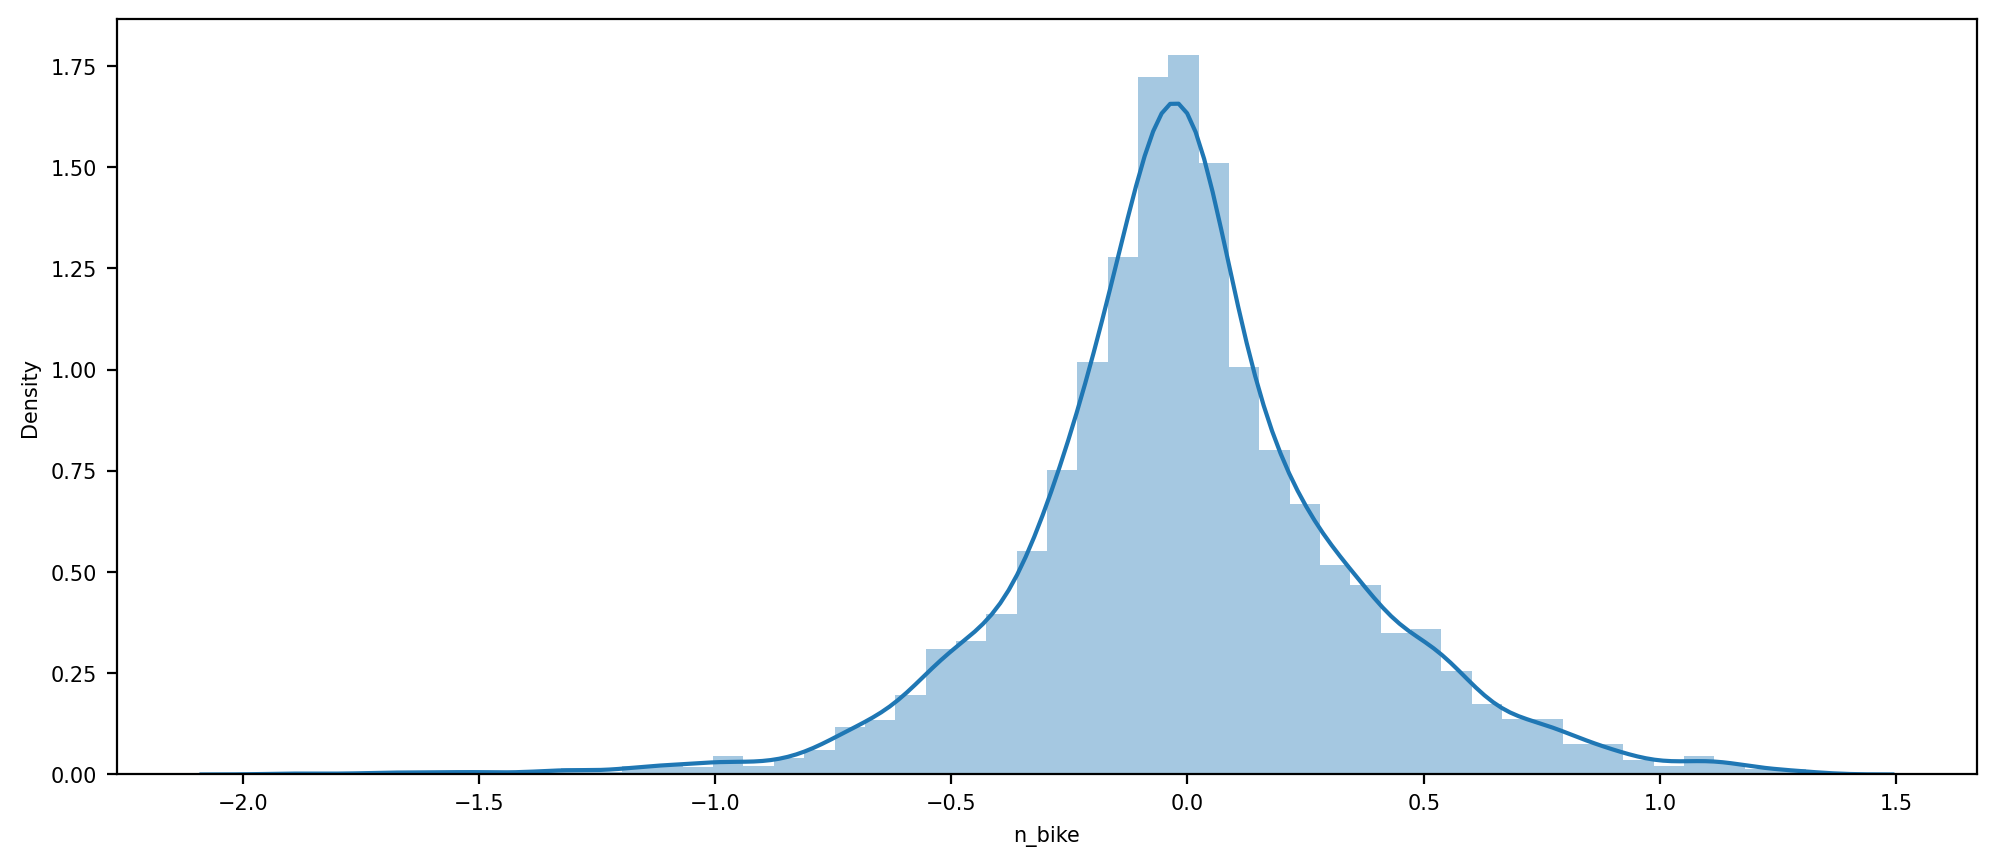

In [152]:
sns.distplot(residuals_train)

In [82]:
#Let's check if the mean of residuals is almost zero:
round((np.mean(residuals_train)))

0